# House Price and Prediction Project

## Introduction

The objective of this project is to predict housing prices based on the features provided.

We will be working with a dataset that includes the prices of houses (target variable) as well as additional features about the houses.

Being able to predict housing prices is valuable both for the buyer and the seller. Why? For a buyer, it is important to understand why the house is priced as is. Nobody likes to overpay and everyone is always looking for a good deal, especially with an investment as large as a house. Understanding how the housing market functions, allows the buyer to make a more calculated choice and to negotiate better. For the seller, they do not want to undersell their property. Understanding what impacts the prices of a house will help the seller make a more informed decision as to how much the property is worth.

For a property developer or a company buying and selling properties, buying low and selling high is the aim. The more the company understands what is an undervalued property and how to upscale the house, the greater the return.

It is also beneficial for economists, the local community, government bodies or even the general public, to be able to predict housing markets trends. For instance, if house prices are falling because of rising interest rates, new policies, tax changes, or programs can be implemented early to minimize the impact of those market changes. Inversely, understanding market trends can help maximize opportunities for local communities preparing to upscale the area through property development. 

## Data Overview

In [6]:
# Import libraries

#Libraries for EDA and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [7]:
df = pd.read_csv("House+Price+Prediction+-+Dataset.csv")

In [8]:
# Dataset has 21'613 rows and 23 columns
df.shape

(21613, 23)

In [9]:
# At first glance data looks clean except for dayhours. However, we will explore each column in more detail
df.sample(10)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
15043,1219000043,20140509T000000,315000,5.0,1.75,2320.0,8100.0,1,0,0.0,...,1160.0,1956,0,98166,47.4631,-122.341,1410.0,7271.0,0.0,10420
16987,323089095,20141031T000000,380000,3.0,1.75,1300.0,12378.0,1,0,0.0,...,0.0,1943,0,98045,47.4996,-121.778,1300.0,11596.0,0.0,13678
8543,3831200200,20150420T000000,172040,3.0,2.25,1710.0,7134.0,1,0,0.0,...,580.0,1979,0,98031,47.3911,-122.191,1790.0,7455.0,0.0,8844
830,2915200210,20141205T000000,500000,2.0,1.00,680.0,5250.0,1,0,0.0,...,0.0,1922,0,98177,47.7013,-122.359,1620.0,5461.0,0.0,5930
17862,8732130140,20141222T000000,285000,4.0,2.25,2150.0,8250.0,1,0,0.0,...,910.0,1978,0,98023,47.3045,-122.378,2050.0,7875.0,0.0,10400
11957,8944290200,20140918T000000,233703,3.0,2.25,1650.0,3788.0,2,0,0.0,...,0.0,1985,0,98031,47.3908,-122.167,1510.0,3994.0,0.0,5438
16446,3995700220,20150317T000000,380000,3.0,1.00,1380.0,8147.0,1,0,0.0,...,0.0,1948,0,98155,47.7407,-122.3,1360.0,8147.0,0.0,9527
15209,1748800120,20150318T000000,353500,4.0,2.50,3250.0,4650.0,2,0,0.0,...,0.0,2007,0,98031,47.4004,-122.203,2960.0,4650.0,0.0,7900
15640,9279200910,20141120T000000,770000,4.0,2.25,2730.0,5000.0,1,0,0.0,...,1270.0,1955,0,98116,47.5843,-122.393,2010.0,5000.0,0.0,7730
18469,6646200420,20150102T000000,633000,4.0,2.50,2020.0,8044.0,2,0,0.0,...,0.0,1990,0,98074,47.6247,-122.043,2320.0,7328.0,0.0,10064


In [10]:
# Reviewing the last columns. 
df.iloc[:10,10:]

,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
5,3,7.0,1610.0,0.0,1994,0,98030,47.3661,$,1610.0,7162.0,0.0,8833
6,3,7.0,1140.0,0.0,2005,0,98103,47.6608,-122.333,1170.0,1116.0,0.0,2198
7,3,10.0,3360.0,1320.0,2005,0,98006,47.5703,-122.165,2800.0,12343.0,1.0,14380
8,3,9.0,3100.0,0.0,1978,0,98042,47.3741,-122.15,1850.0,9438.0,1.0,13100
9,3,7.0,1460.0,0.0,1983,0,98031,47.4048,-122.178,1460.0,8153.0,0.0,11966


* At first glance houses without a basement and houses not renovated are given a numerical value of 0 rather than a NaN. This may need to be readapted after EDA.
* Some data cleaning will be needed for the "long" feature

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

- There are 16 numerical columns in this dataset and 7 non-numerical columns.
    - Feature "dayhours" and "yr_built" will need to be converted to data type datatime
    - Features "ceil", "coast", "condition", "long" and "total_area" will need to be converted to a numerical data type.
    - Most columns have null values. These will need to be cleaned up

In [12]:
# When was the data collected?
df.iloc[:,14:15].sort_values("yr_built",ascending=True).head(15)

,yr_built
13562,$
2407,$
15749,$
14044,$
4529,$
8205,$
13581,$
2974,$
1906,$
131,$


In [13]:
# When was the data collected?
df.iloc[:,14:15].sort_values("yr_built",ascending=True).tail(5)

,yr_built
4933,2015
8691,2015
11783,2015
16232,2015
21226,NaN


Every house is given a ID, or in this case a cid.

Data was collected between 1900 - 2015. Looking at the latitude and longitude data, it seems to be in King County, Washington, USA. Including the city of Seattle. This will be explored further.

For each house we have data for when the house was built, sold and renovated. We also have data on this size of the house and the land. Number of floors, the quality of the house, and the location of the house are also included. We also have the price which we will use as the predicitor for the model and a few additional features. All of these features will help to build our prediction model.

## Exploratory Data Analysis

### Uni-variate analysis

In [14]:
# BOXPLOT AND HISTOGRAM COMBINED

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# FUNCTION TO CREATE LABELED BARPLOT


def labeled_barplot(data, feature, perc=False, n=None):
    
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Text(0.5, 1.5, 'Price ($)')

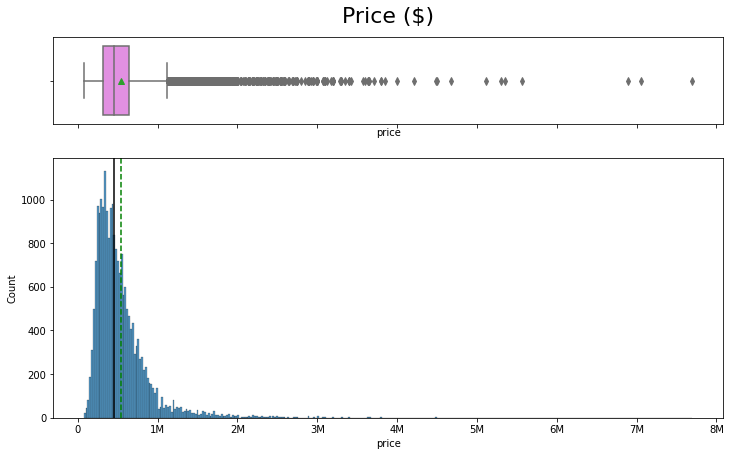

In [17]:
#Price
histogram_boxplot(df,"price")
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Price ($)", y=1.5, fontsize=22)

In [18]:
print("Median price is:", df["price"].median())
print("Min price is:", df["price"].min())
print("Max price is:", df["price"].max())

Median price is: 450000.0
Min price is: 75000
Max price is: 7700000


- Price distribution is positively skewed
- Prices range from 75k to 7.7 million. The median price is 450k
- There are many outliers on the right end of the boxplot

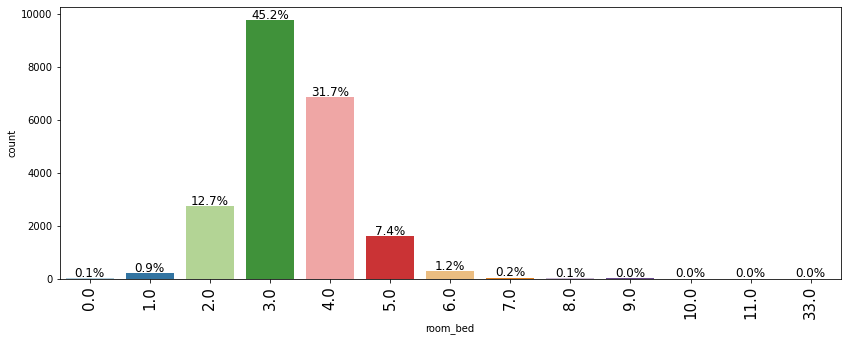

In [19]:
#Room_bed
labeled_barplot(df,"room_bed",perc=True)

- 3 bedrooms per house is the most common. 45.2 % 
- 4 bedrooms or 2 bedrooms is also very common. 31.7% and 12.7%.
- Combined 2,3 and 4 bedrooms account for 89.6% of houses
- Some houses have 0 bedrooms. This does not mean the house has 0 beds. It is possible the bed is in the same space as the living room.

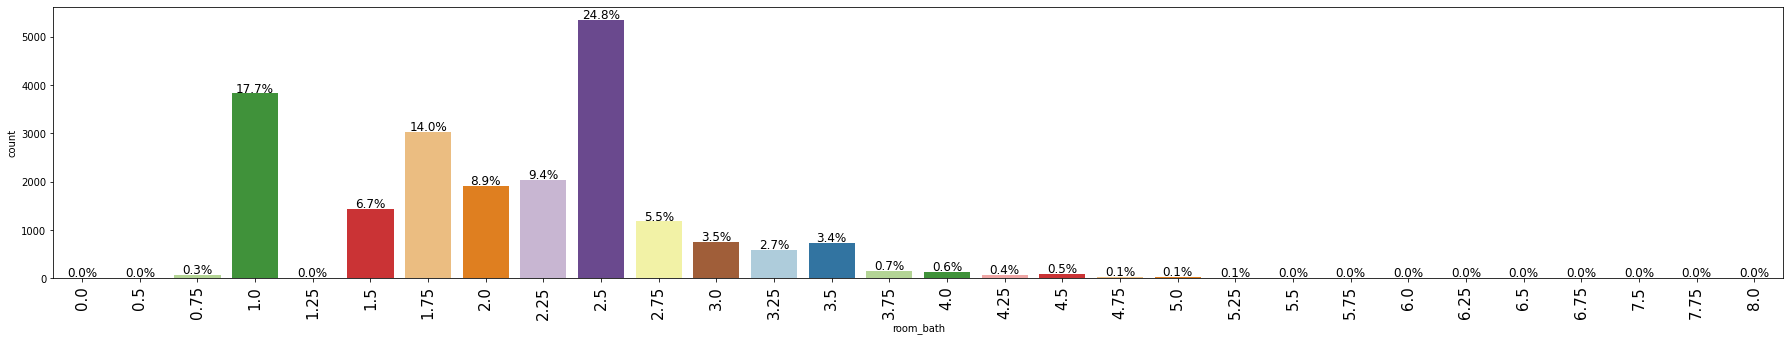

In [20]:
#Room_bath
labeled_barplot(df,"room_bath",perc=True)

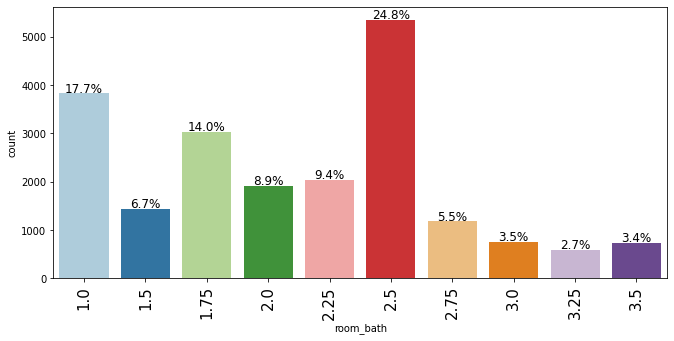

In [21]:
#Focusing the data
labeled_barplot(df,"room_bath",perc=True,n=10)

- 2.5 bathrooms is the most common. 24.8%. Followed by 1 bathroom (17.7%), followed by 1.75 (14.0%)

Text(0.5, 1.5, 'Square footage of the home (sq ft)')

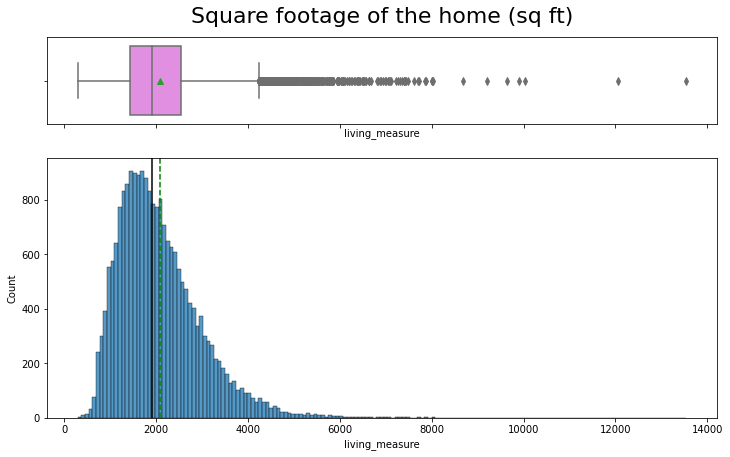

In [22]:
#Living_measure
histogram_boxplot(df,"living_measure")
plt.title("Square footage of the home (sq ft)", y=1.5, fontsize=22)

In [23]:
print("Median square footage is:", df["living_measure"].median())
print("Min square footage is:", df["living_measure"].min())
print("Max square footage is:", df["living_measure"].max())

Median square footage is: 1910.0
Min square footage is: 290.0
Max square footage is: 13540.0


- living_measure distribution is positively skewed
- Square footage for the home ranges from 290 sq ft to 13'540 sq ft. The median square footage is 1'910 sq ft.
- There are many outliers on the right end of the boxplot
- Some of the houses have over 8'000 sq ft. Maybe these were inputted incorrectly. We will examine these more closely during the pre-processing step. 

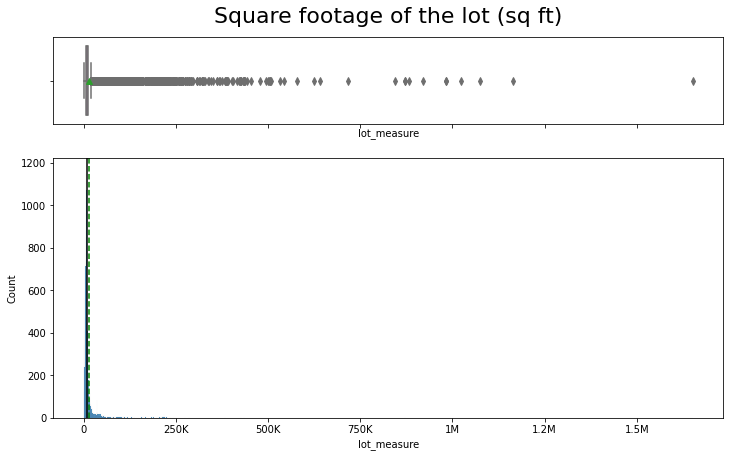

In [24]:
#Lot_measure
histogram_boxplot(df,"lot_measure")
plt.title("Square footage of the lot (sq ft)", y=1.5, fontsize=22)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

Text(0.5, 1.5, 'Square footage of the lot (sq ft)')

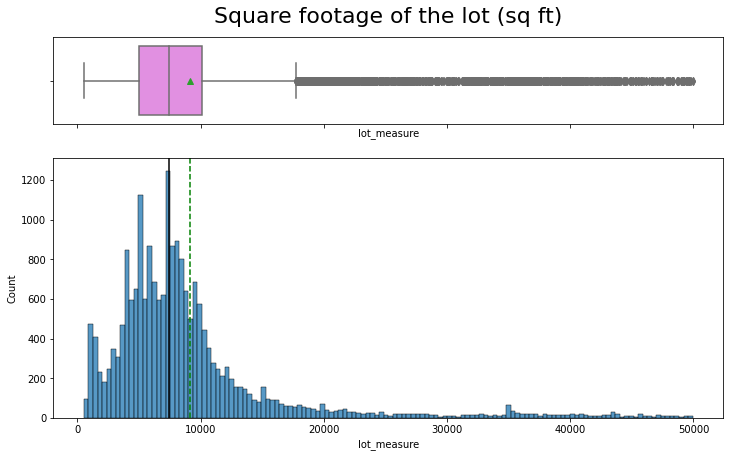

In [25]:
#Focusing on the smaller values
histogram_boxplot(df[df["lot_measure"]<50000],"lot_measure")
plt.title("Square footage of the lot (sq ft)", y=1.5, fontsize=22)

In [26]:
print("Median square footage is:", df["lot_measure"].median())
print("Min square footage is:", df["lot_measure"].min())
print("Max square footage is:", df["lot_measure"].max())

Median square footage is: 7618.0
Min square footage is: 520.0
Max square footage is: 1651359.0


- lot_measure distribution is positively skewed
- Square footage for the lot ranges from 520 sq ft to 1.6 million sq ft. The median square footage is 7'618 sq ft.
- There are many outliers on the right end of the boxplot and there are many houses with large lots of land.

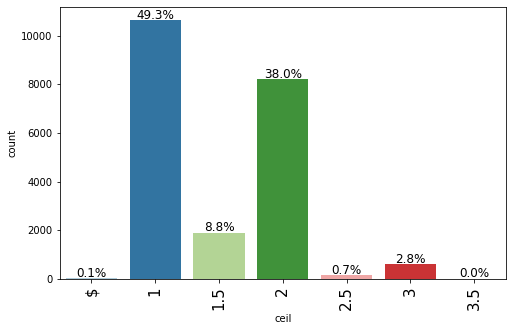

In [27]:
#Ceil
labeled_barplot(df,"ceil",perc=True)

- Most houses have 1 floor. 49.3%. Followed by 2 floors. 38.0%. Combined they make up 87.3% of houses.
- Some houses have a floor of "$". This is error in data inputting and will be corrected during the pre-processing step.

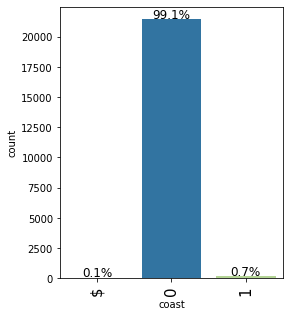

In [28]:
#Coast
labeled_barplot(df,"coast",perc=True)

- 99.1% of houses do not have a view to a waterfront.
- "$". This is error in data inputting and will be corrected during the pre-processing step.

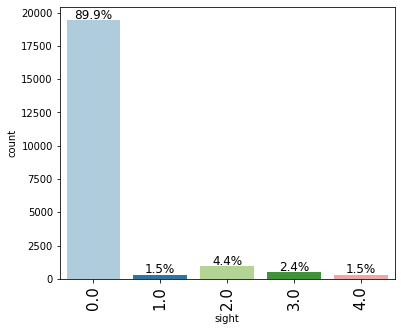

In [29]:
#Sight
labeled_barplot(df,"sight",perc=True)

- 89.9% of houses have not been viewed. This is likely because they are not for sale.
- The other houses have been viewed between 1 - 4 times.

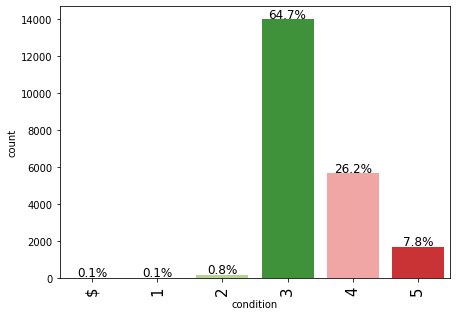

In [30]:
#Condition
labeled_barplot(df,"condition",perc=True)

- Houses are rated from 1 - 5
- 98.7% of houses were rated either 3,4 or 5 out of 5 in terms of overal condition.
- 3 was the most common rating. 64.7%
- 7.8% of houses rated 5 out of 5
- Some houses have a floor of "$". This will be corrected during the pre-processing step.

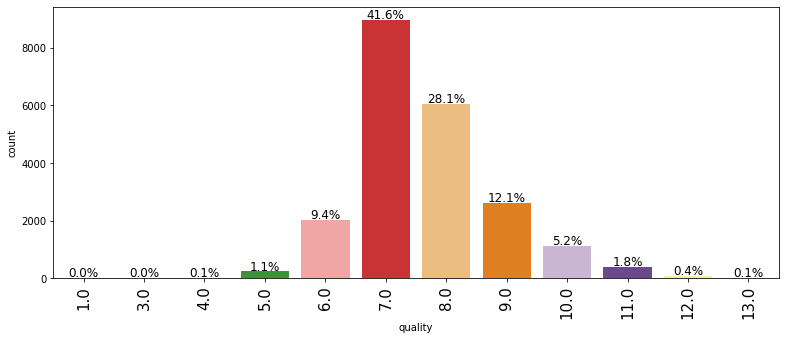

In [31]:
#Quality
labeled_barplot(df,"quality",perc=True)

- Quality was graded from 1 - 13.
- A score of 7 was the most common. 41.6%. Followed by 8. 28.1%
- Only 0.1% of houses were graded 13 out of 13.

Text(0.5, 1.5, 'Square footage of house apart from basement (sq ft)')

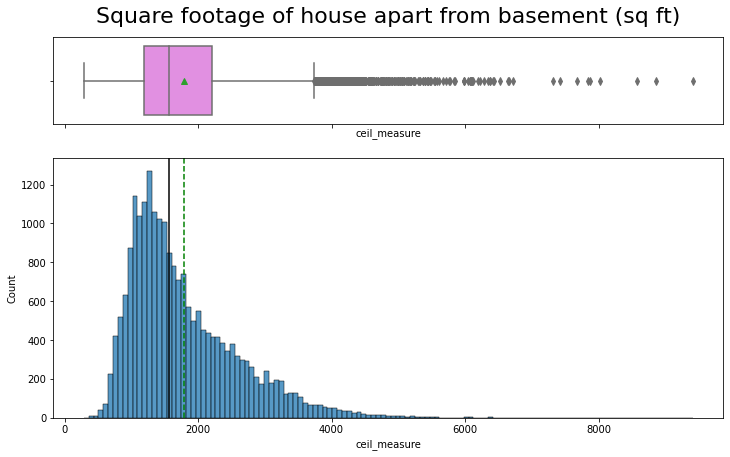

In [32]:
#Ceil_measure
histogram_boxplot(df,"ceil_measure")
plt.title("Square footage of house apart from basement (sq ft)", y=1.5, fontsize=22)

In [33]:
print("Median square footage is:", df["ceil_measure"].median())
print("Min square footage is:", df["ceil_measure"].min())
print("Max square footage is:", df["ceil_measure"].max())

Median square footage is: 1560.0
Min square footage is: 290.0
Max square footage is: 9410.0


- ceil_measure distribution is positively skewed
- Square footage for the house apart from basement ranges from 290 sq ft to 9'410 sq ft. The median square footage is 1'560 sq ft.
- There are many outliers on the right end of the boxplot

Text(0.5, 1.5, 'Square footage of basement (sq ft)')

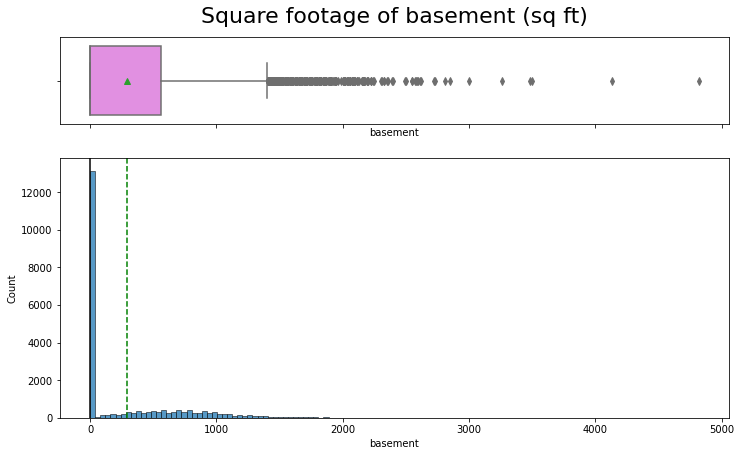

In [34]:
#Basement
histogram_boxplot(df,"basement")
plt.title("Square footage of basement (sq ft)", y=1.5, fontsize=22)

In [35]:
#How many do not have a basement?
df[df["basement"]==0].shape

(13125, 23)

- 60.7% of houses do not have a basement

Text(0.5, 1.5, 'Square footage of basement (sq ft)')

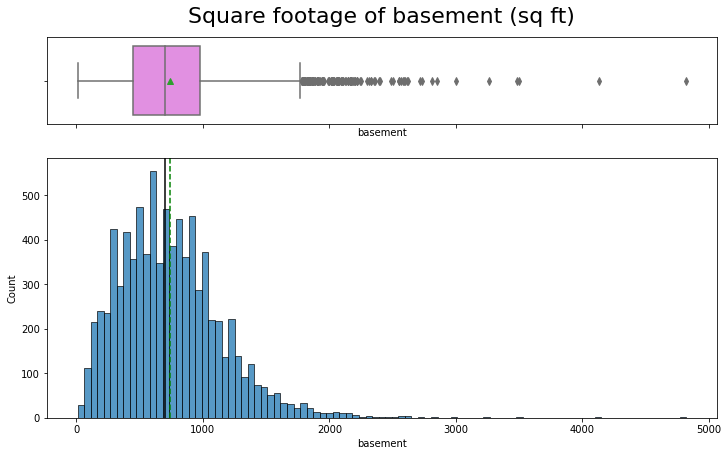

In [36]:
#Focusing on the values > 0
histogram_boxplot(df[df["basement"]!=0],"basement")
plt.title("Square footage of basement (sq ft)", y=1.5, fontsize=22)

In [37]:
print("Median square footage is:", df["basement"].median())
print("Min square footage is:", df["basement"].min())
print("Max square footage is:", df["basement"].max())

Median square footage is: 0.0
Min square footage is: 0.0
Max square footage is: 4820.0


- basement distribution is positively skewed
- Square footage for the basement ranges from 0 sq ft to 4'820 sq ft. The median square footage is 0 sq ft.
- There are many outliers on the right end of the boxplot

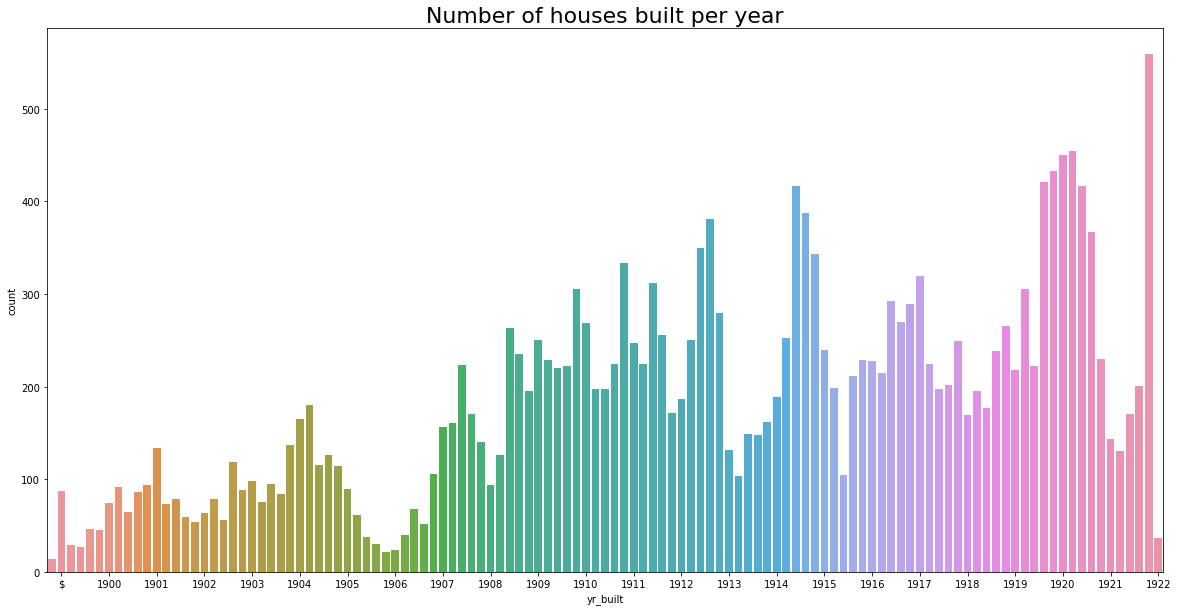

In [38]:
#Year built
plt.figure(figsize=(20,10))
sns.countplot(data=df.sort_values("yr_built",ascending=True),x="yr_built")
plt.xticks([1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116])
plt.title("Number of houses built per year", fontsize=22)
plt.show()

- Houses in this dataset were built between 1900 and 2015.
- 2014 had the most houses built.
- Number of houses built slowly increases year on year

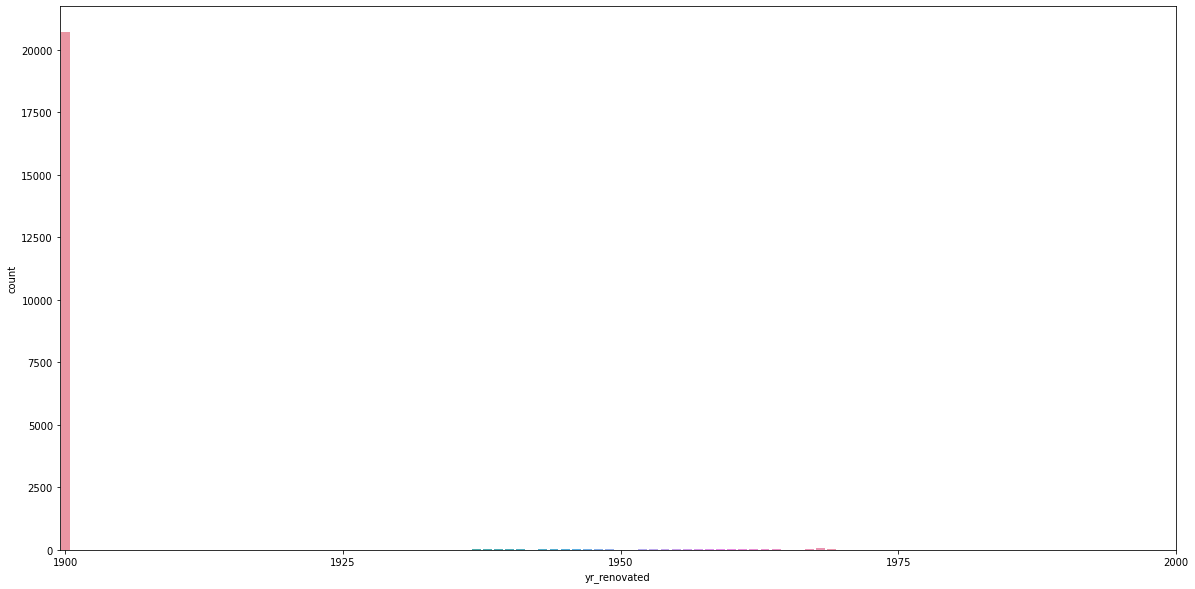

In [39]:
#Year Renovated
plt.figure(figsize=(20,10))
sns.countplot(data=df.sort_values("yr_renovated",ascending=True),x="yr_renovated")
plt.xticks([0,25,50,75,100],["1900","1925","1950","1975","2000"])
plt.show()

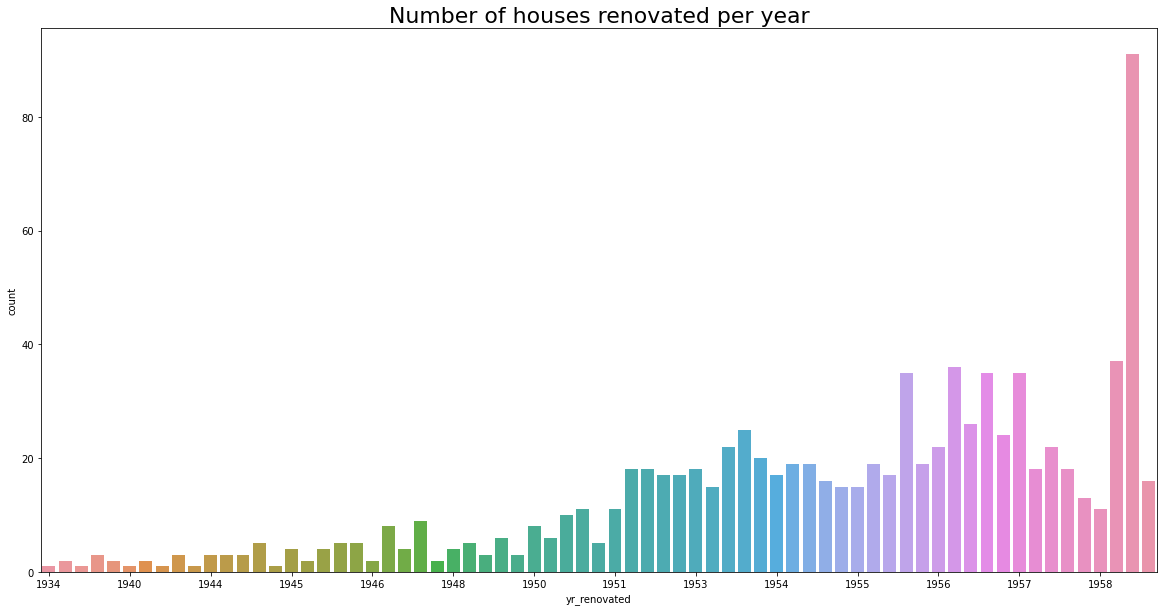

In [40]:
#Focusing on renovated houses
plt.figure(figsize=(20,10))
sns.countplot(data=df[df["yr_renovated"]!=0].sort_values("yr_renovated",ascending=True),x="yr_renovated")
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.title("Number of houses renovated per year", fontsize=22)
plt.show()

In [41]:
# How many houses have not been renovated?
df[df["yr_renovated"]==0].shape

(20699, 23)

- 95.8% of houses have not been renovated
- No house was renovated before 1934
- Most renovations happened in 2014.
- Number of houses renovated slowly increases year on year

Text(0.5, 1.5, 'Living room area in 2015 in sq ft')

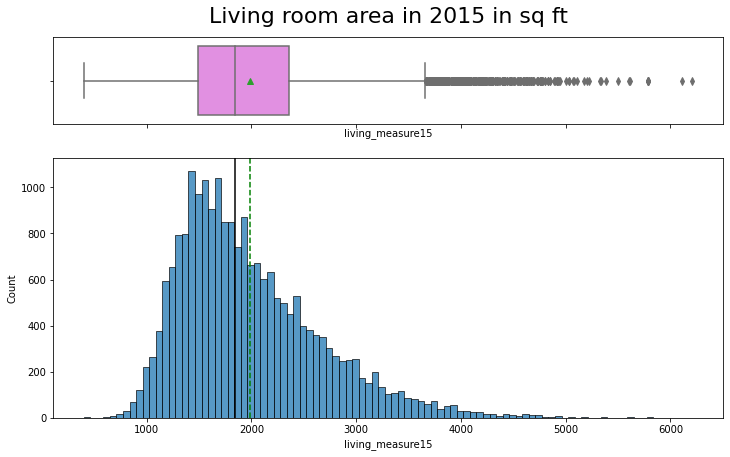

In [42]:
#Living_measure15
histogram_boxplot(df,"living_measure15")
plt.title("Living room area in 2015 in sq ft", y=1.5, fontsize=22)

In [43]:
print("Median square footage is:", df["living_measure15"].median())
print("Min square footage is:", df["living_measure15"].min())
print("Max square footage is:", df["living_measure15"].max())

Median square footage is: 1840.0
Min square footage is: 399.0
Max square footage is: 6210.0


- Living_measure15 distribution is positively skewed
- Square footage for the living room area in 2015 ranges from 399 sq ft to 6'210 sq ft. The median square footage is 1'840 sq ft.
- There are many outliers on the right end of the boxplot

Text(0.5, 1.5, 'Lot area in 2015 in sq ft')

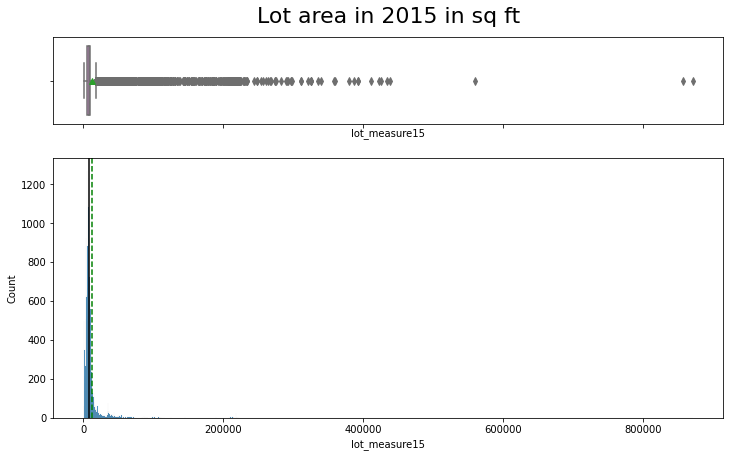

In [44]:
#lot_measure15
histogram_boxplot(df,"lot_measure15")
plt.title("Lot area in 2015 in sq ft", y=1.5, fontsize=22)

Text(0.5, 1.5, 'Lot area in 2015 in sq ft')

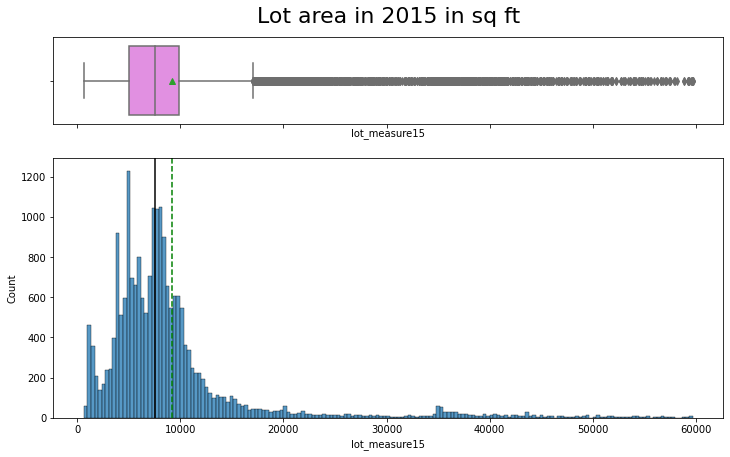

In [45]:
#Focusing on smaller values
histogram_boxplot(df[df["lot_measure15"]<60000],"lot_measure15")
plt.title("Lot area in 2015 in sq ft", y=1.5, fontsize=22)

In [46]:
print("Median square footage is:", df["lot_measure15"].median())
print("Min square footage is:", df["lot_measure15"].min())
print("Max square footage is:", df["lot_measure15"].max())

Median square footage is: 7620.0
Min square footage is: 651.0
Max square footage is: 871200.0


- Lot_measure15 distribution is positively skewed
- Square footage for lot area in 2015 ranges from 651 sq ft to 871'200 sq ft. The median square footage is 7'620 sq ft.
- There are many outliers on the right end of the boxplot

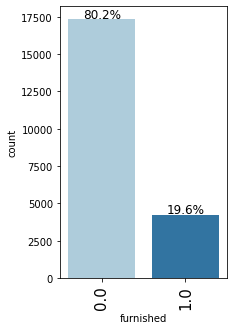

In [47]:
#Furnished
labeled_barplot(df,"furnished",perc=True)

- 80.2% of houses have not been furnished

- We have finished the uni-variate analysis.
- zipcode. But these features will be explored during the bi-variate analysis.
- Some features such as Dayhours and total_area need to be converted to a integer before we can explore the data. This will be done during the pre-processing step.

### Bi-variate analysis

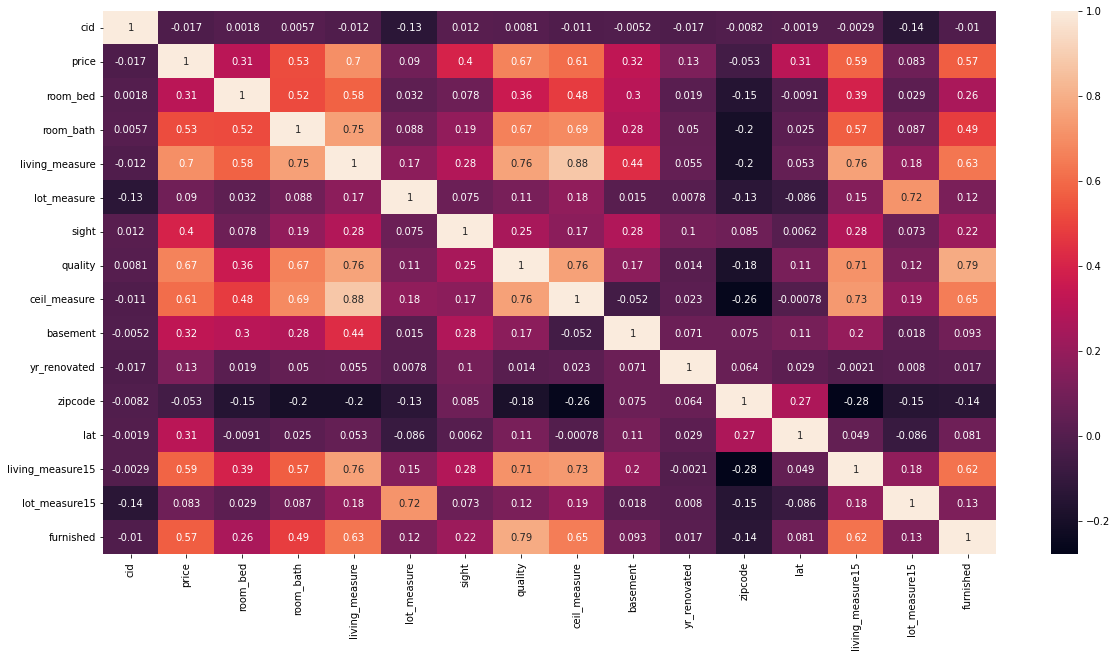

In [48]:
# Correlation between features using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

- Most features either have a positive correlation with one another or no correlation. Very few have a negative correlation.
- Features living_measure, living_measure15, quality, and ceil_measure are positively correlated with many features
- Most prominent correlations include:
    - Price is positively correlated with living_measure (0.7)
    - Room_bath is positively correlated with living_measure (0.75)
    - Living_measure is positively correlated with ceil_measure (0.88), living_measure15 (0.76), quality (0.76), and price (0.7)
    - Lot_measure is positively correlated with lot_measure15 (0.72)
    - Quality is positively correlated with furnished (0.79), ceil measure (0.76), living_measure (0.76), and living_measure15 (0.71) 
    - Ceil_measure is positively correlated with living_measure (0.88), quality (0.76), and living_measure15 (0.73)
    - Living_measure15 is positively correlated with living_measure (0.76), ceil_measure (0.73), and quality (0.71) 
    - Lot_measure15 is positively correlated with lot_measure (0.72)
    - Furnished is positively correlated with quality (0.79)

Text(0.5, 1.0, 'Relationship between house price and number of bedrooms')

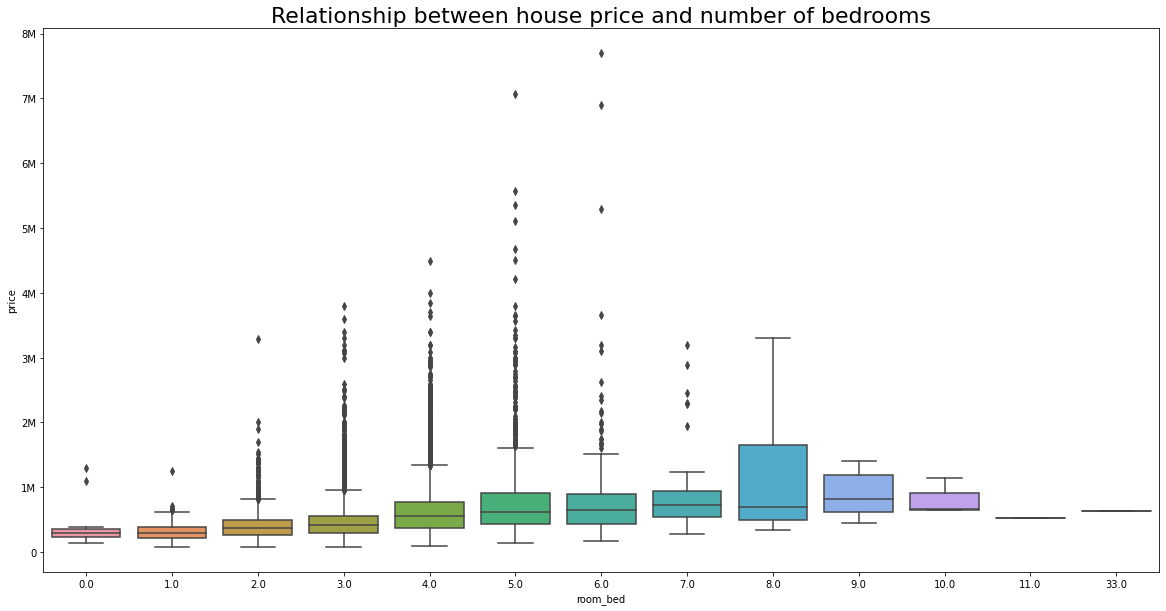

In [49]:
# Correlation between price and room_bed
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="room_bed",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and number of bedrooms", fontsize=22)

Text(0.5, 1.0, 'Relationship between house price and number of bathrooms per house')

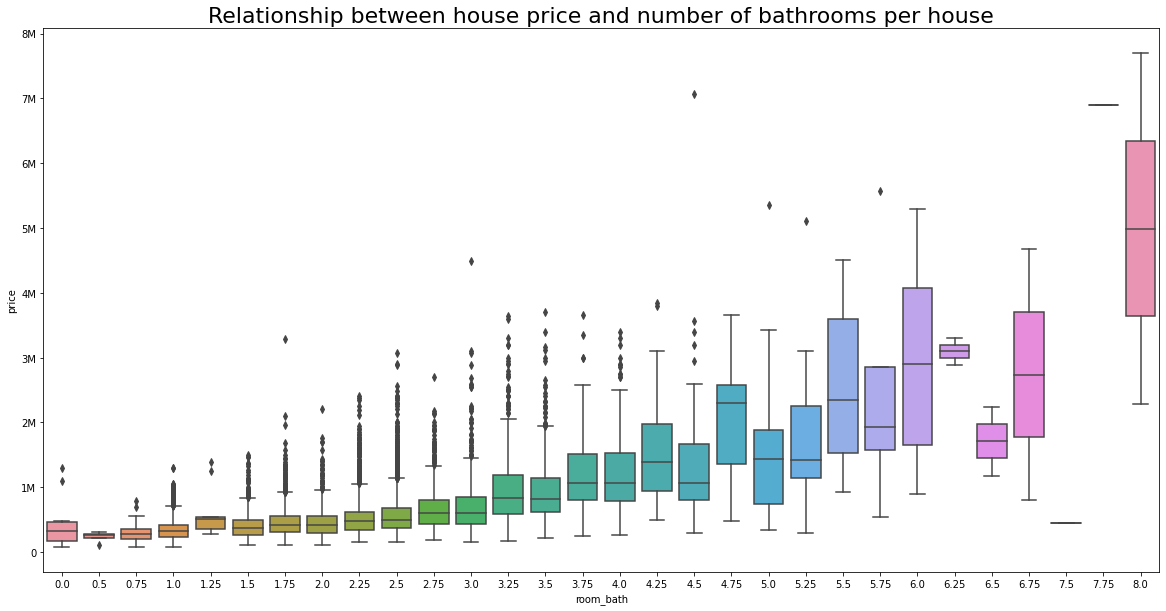

In [50]:
# Correlation between price and room_bath
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="room_bath",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and number of bathrooms per house", fontsize=22)

- Houses with more bedrooms are typically more expensive.
- Houses with more bathrooms are also typically more expensive.
- There are many outliers beyond the max whiskers

Text(0.5, 1.0, 'Relationship between number of bedrooms, bathrooms and if the house is furnished')

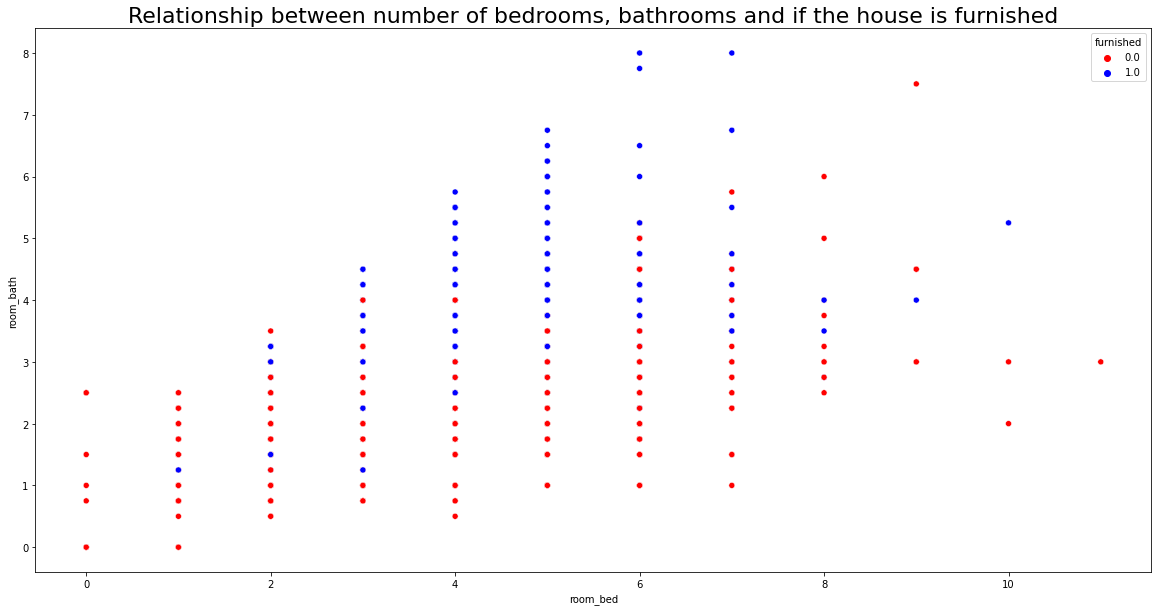

In [51]:
# Correlation between room_bath, room_bed, and furnished
plt.figure(figsize=(20,10))
sns.scatterplot(data=df[df["room_bed"]<15],x="room_bed",y="room_bath",hue="furnished",palette='bwr_r')
plt.title("Relationship between number of bedrooms, bathrooms and if the house is furnished", fontsize=22)

- There is a positive correlation between the number of bedrooms and number of bathrooms in a house
- Furnished houses typically have more bathrooms

Text(0.5, 1.0, 'Relationship between house price, living space and if the house is furnished')

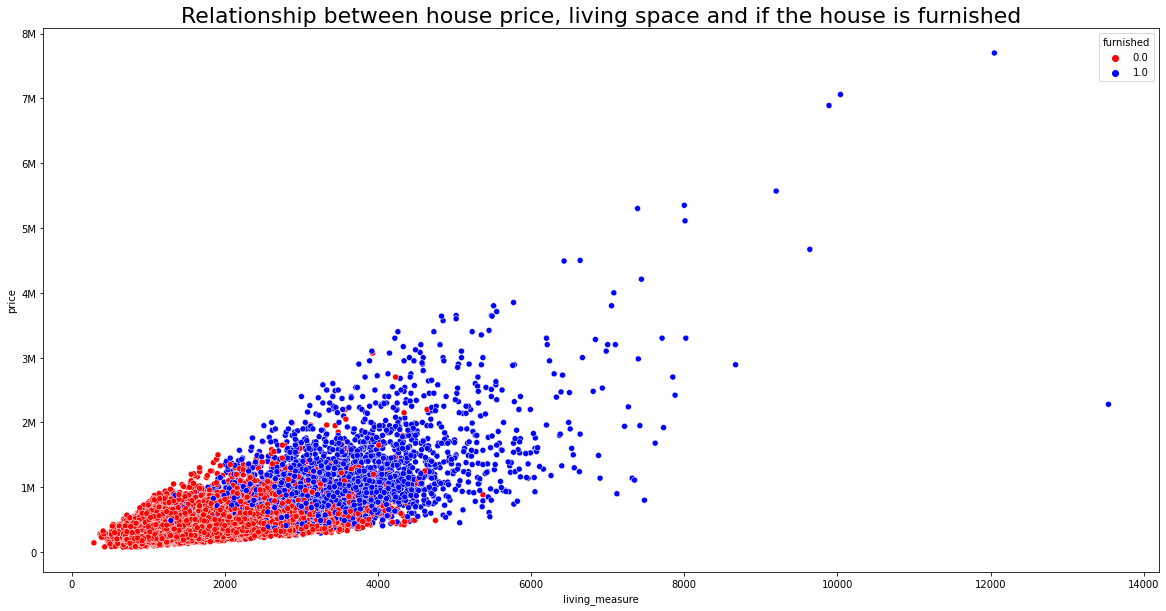

In [52]:
# Correlation between price, living_measure, and furnished
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x="living_measure",y="price",hue="furnished",palette='bwr_r')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price, living space and if the house is furnished", fontsize=22)

- There is a positive correlation between price and living_measure
- Houses with a higher price and a larger square footage are more likely to be furnished

Text(0.5, 1.0, 'Relationship between house price, living space and house quality')

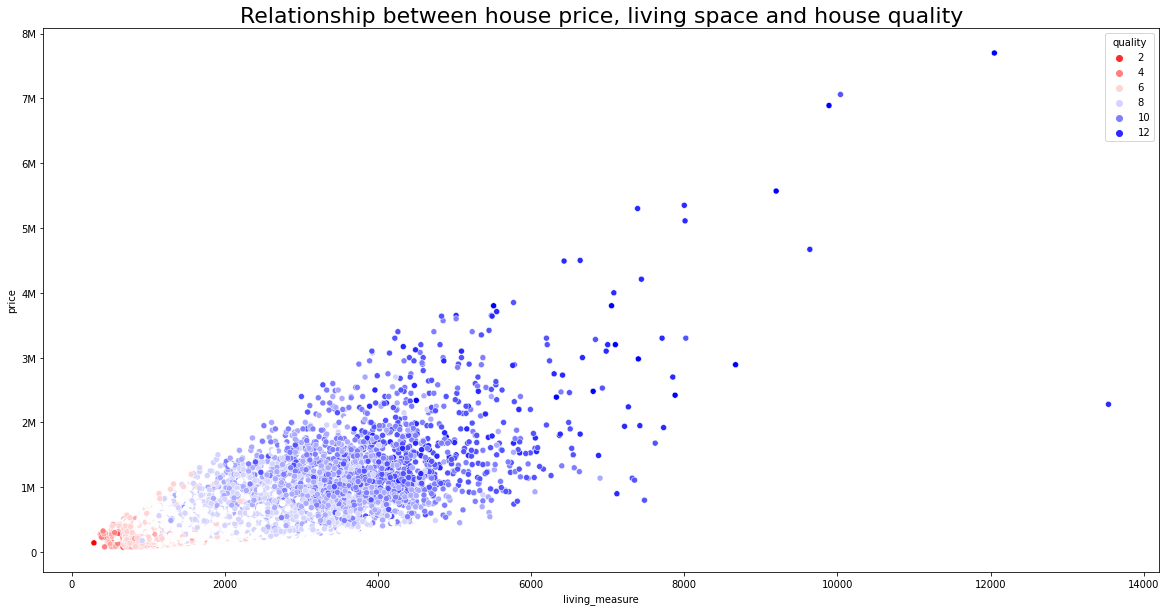

In [53]:
# Correlation between price, living_measure, and quality
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x="living_measure",y="price",hue="quality",palette='bwr_r')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price, living space and house quality", fontsize=22)

- There is a positive correlation between the price, living space, and the grade given for quality

Text(0.5, 1.0, 'Relationship between house price, living space and housing condition')

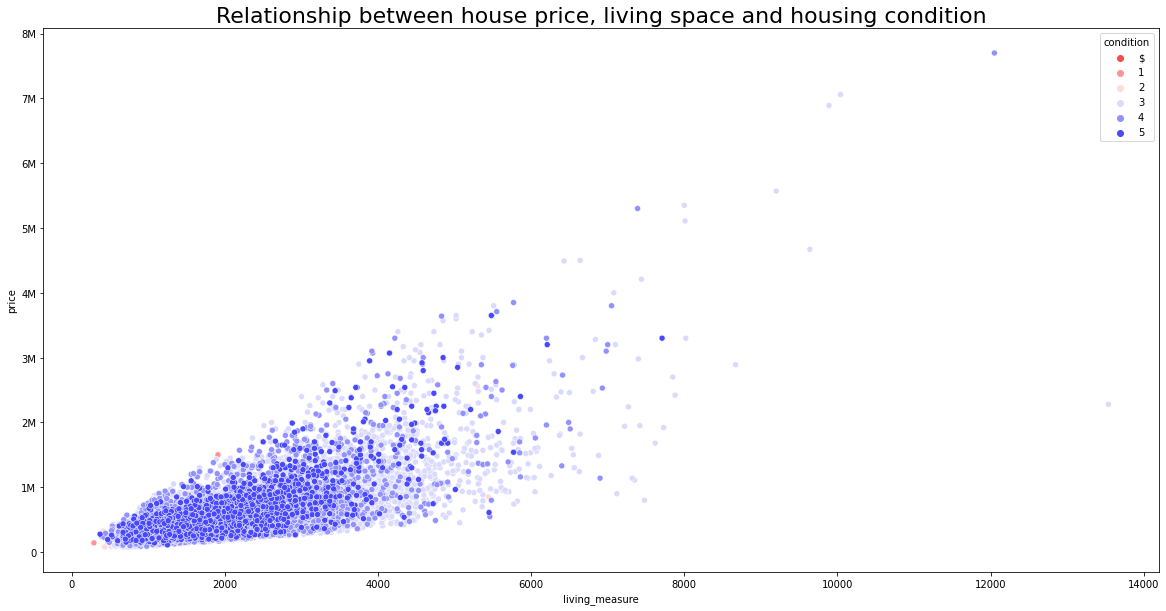

In [54]:
# Correlation between price, living_measure, and quality
plt.figure(figsize=(20,10))
sns.scatterplot(data=df.sort_values("condition",ascending=True),x="living_measure",y="price",hue="condition",palette='bwr_r')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price, living space and housing condition", fontsize=22)

- No clear relation between price, living_measure, and condition

Text(0.5, 1.0, 'Relationship between house price and number of floors')

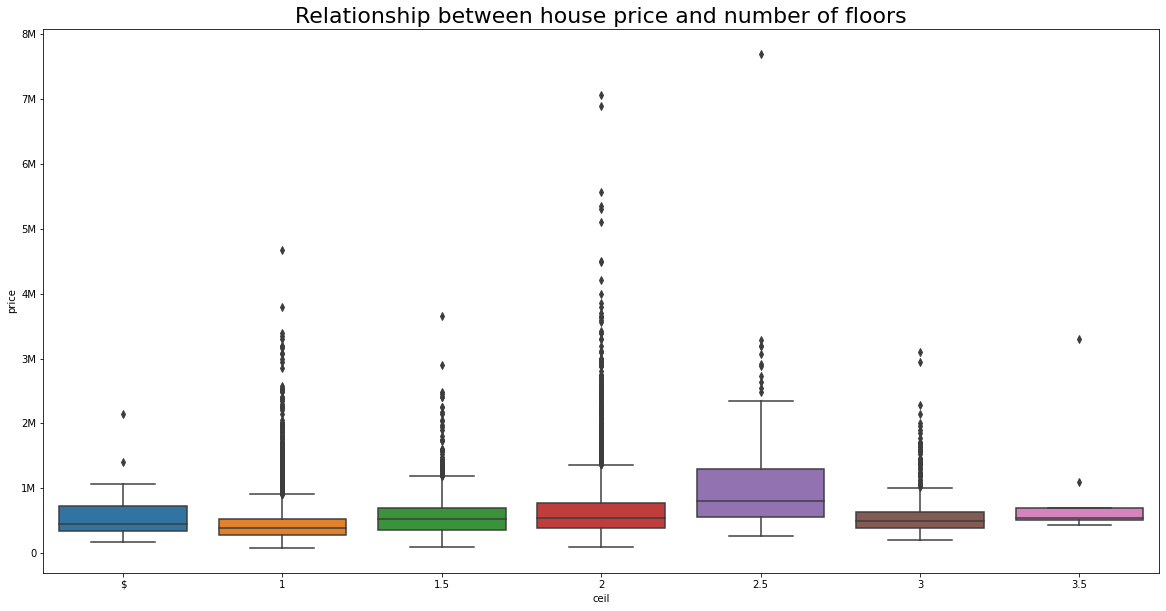

In [55]:
# Correlation between price and ceil
plt.figure(figsize=(20,10))
sns.boxplot(data=df.sort_values("ceil",ascending=True),x="ceil",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and number of floors", fontsize=22)

- No significant increase in price for houses with more levels.
- There are many outliers beyond the max whiskers
- Rows with the "$" will need to be cleaned during the pre-processing step.

Text(0.5, 1.0, 'Relationship between house price and waterfront view')

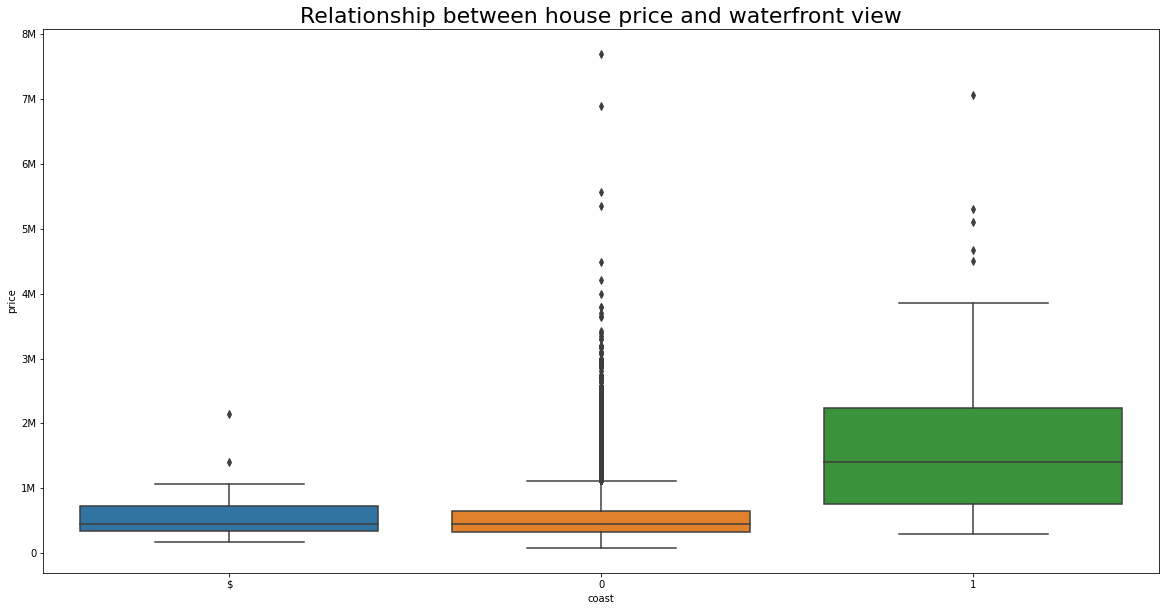

In [56]:
# Correlation between price and coast
plt.figure(figsize=(20,10))
sns.boxplot(data=df.sort_values("coast",ascending=True),x="coast",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and waterfront view", fontsize=22)

- Houses with a waterfront view typically cost more. However there are many outliers for houses without a waterfront view.
- Rows with the "$" will need to be cleaned during the pre-processing step.

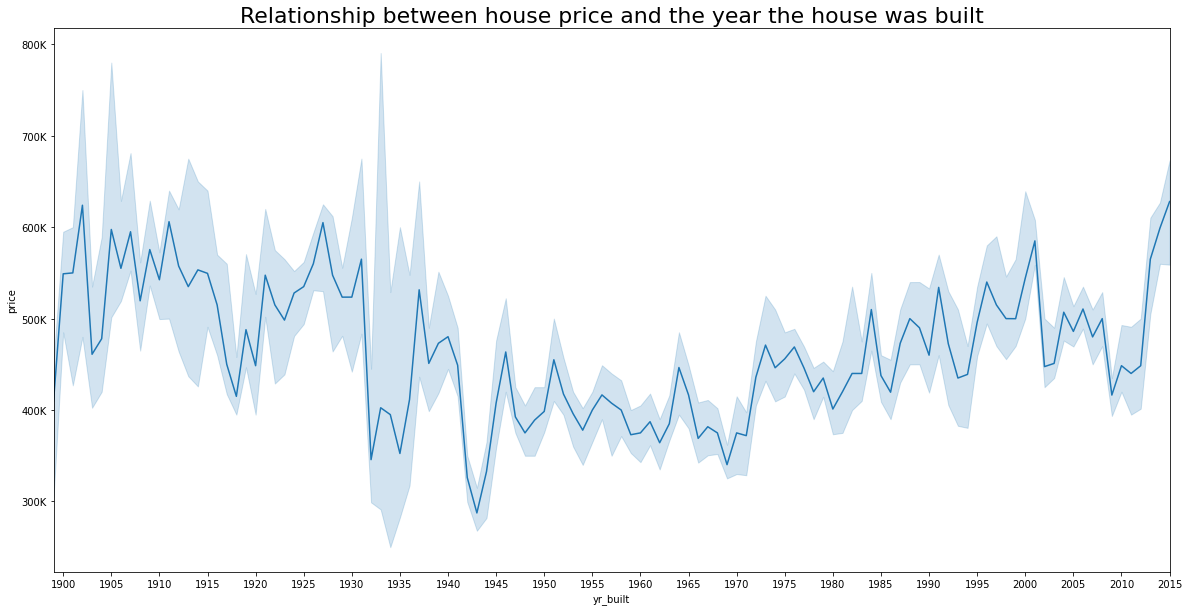

In [57]:
# Correlation between price and yr_built
plt.figure(figsize=(20,10))
x = sns.lineplot(data=df.sort_values("yr_built",ascending=True),x="yr_built",y="price",estimator=np.median)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.xticks([1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116])
plt.xlim(0,116)
plt.title("Relationship between house price and the year the house was built", fontsize=22)
plt.show()

- Houses built between 1900-1930 and 1995-2015 are priced the highest.
- Prices of houses falls after 1930 and only starts to recuperate after 1970.

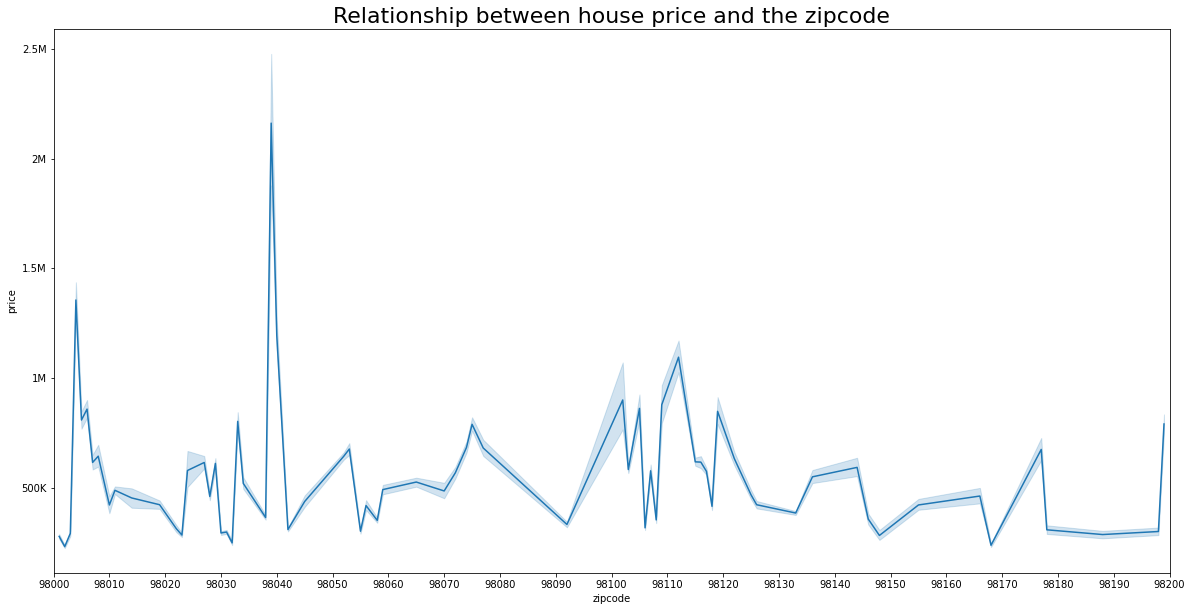

In [58]:
# Correlation between price and zipcode
plt.figure(figsize=(20,10))
sns.lineplot(data=df.sort_values("zipcode",ascending=True),x="zipcode",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.xticks([98000,98010,98020,98030,98040,98050,98060,98070,98080,98090,98100,98110,98120,98130,98140,
            98150,98160,98170,98180,98190,98200])
plt.xlim(98000,98200)
plt.title("Relationship between house price and the zipcode", fontsize=22)
plt.show()

- Houses are prices differently priced depending on the zipcode.
- Expensive houses can be found in the zipcodes around 98000, 98040, and 98110

## Data Pre-processing

### Data Cleaning

In [59]:
# Feature cid will not be useful for the model since it contains nothing but unique values. We can therefore drop it
df.drop("cid",axis=1,inplace=True)

In [60]:
# Checking null values
df.isna().sum()

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [61]:
# Checking % of values null
round(df.isnull().sum() * 100 / len(df),2)

dayhours            0.00
price               0.00
room_bed            0.50
room_bath           0.50
living_measure      0.08
lot_measure         0.19
ceil                0.19
coast               0.00
sight               0.26
condition           0.26
quality             0.00
ceil_measure        0.00
basement            0.00
yr_built            0.00
yr_renovated        0.00
zipcode             0.00
lat                 0.00
long                0.00
living_measure15    0.77
lot_measure15       0.13
furnished           0.13
total_area          0.13
dtype: float64

In [62]:
# Checking unknown values
df.isin(["$"]).sum()

dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                30
coast               30
sight                0
condition           28
quality              0
ceil_measure         0
basement             0
yr_built            14
yr_renovated         0
zipcode              0
lat                  0
long                34
living_measure15     0
lot_measure15        0
furnished            0
total_area          39
dtype: int64

- Some of the columns have null values but not too many. 
- Feature "living_measure15" has the highest number of null values. Approx. 0.8%
- The null values will need to be cleaned up before we can run the model.
- We also noticed during EDA that some columns contained a unknown value "$". This will also need to be cleaned up.

In [63]:
# Removing unknown value "$"
df["ceil"] = df["ceil"].replace("$",np.nan)
df["coast"] = df["coast"].replace("$",np.nan)
df["condition"] = df["condition"].replace("$",np.nan)
df["yr_built"] = df["yr_built"].replace("$",np.nan)
df["long"] = df["long"].replace("$",np.nan)
df["total_area"] = df["total_area"].replace("$",np.nan)

In [64]:
# Filling NaN values with groupby and median values
# "zipcode" was chosen for the groupby because this feautre had no missing data and had numerous unique variables.
df["room_bed"] = df.groupby(["zipcode"])["room_bed"].transform(lambda x: x.fillna(x.median()))
df["room_bath"] = df.groupby(["zipcode"])["room_bath"].transform(lambda x: x.fillna(x.median()))
df["living_measure"] = df.groupby(["zipcode"])["living_measure"].transform(lambda x: x.fillna(x.median()))
df["lot_measure"] = df.groupby(["zipcode"])["lot_measure"].transform(lambda x: x.fillna(x.median()))
df["ceil"] = df.groupby(["zipcode"])["ceil"].transform(lambda x: x.fillna(x.median()))
df["coast"] = df.groupby(["zipcode"])["coast"].transform(lambda x: x.fillna(x.median()))
df["sight"] = df.groupby(["zipcode"])["sight"].transform(lambda x: x.fillna(x.median()))
df["condition"] = df.groupby(["zipcode"])["condition"].transform(lambda x: x.fillna(x.median()))
df["quality"] = df.groupby(["zipcode"])["quality"].transform(lambda x: x.fillna(x.median()))
df["ceil_measure"] = df.groupby(["zipcode"])["ceil_measure"].transform(lambda x: x.fillna(x.median()))
df["basement"] = df.groupby(["zipcode"])["basement"].transform(lambda x: x.fillna(x.median()))
df["yr_built"] = df.groupby(["zipcode"])["yr_built"].transform(lambda x: x.fillna(x.median()))
df["living_measure15"] = df.groupby(["zipcode"])["living_measure15"].transform(lambda x: x.fillna(x.median()))
df["lot_measure15"] = df.groupby(["zipcode"])["lot_measure15"].transform(lambda x: x.fillna(x.median()))
df["furnished"] = df.groupby(["zipcode"])["furnished"].transform(lambda x: x.fillna(x.median()))
df["long"] = df.groupby(["zipcode"])["long"].transform(lambda x : x.fillna(x.median()))
df["total_area"] = df.groupby(["zipcode"])["total_area"].transform(lambda x: x.fillna(x.median()))

In [65]:
#Re-checking for NaN values
df.isnull().sum()

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

- Next step is to change the data types of the features so that we can utilize them for the machine learning model.

In [66]:
#Changing feature "dayhours" to date time 
df["dayhours"] = df["dayhours"].str.split("T",expand=True)[:][0]

In [67]:
df["dayhours"] = pd.to_datetime(df.dayhours)

In [68]:
df["year_sold"] = df["dayhours"].dt.year
df["month_sold"] = df["dayhours"].dt.month
df["day_sold"] = df["dayhours"].dt.day

- Now that we have split dayhours into year, month, and day we can drop the original column

In [69]:
df.drop(["dayhours"],axis=1,inplace=True)

In [70]:
#Changing features to numeric values
df["ceil"] = df.ceil.astype(float)
df["coast"] = df.coast.astype("int64")
df["condition"] = df.condition.astype("int64")
df["yr_built"] = df.yr_built.astype("int64")
df["long"] = df.long.astype(float)
df["total_area"] = df.total_area.astype("int64")

In [71]:
#Re-checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21613 non-null  float64
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  float64
 4   lot_measure       21613 non-null  float64
 5   ceil              21613 non-null  float64
 6   coast             21613 non-null  int64  
 7   sight             21613 non-null  float64
 8   condition         21613 non-null  int64  
 9   quality           21613 non-null  float64
 10  ceil_measure      21613 non-null  float64
 11  basement          21613 non-null  float64
 12  yr_built          21613 non-null  int64  
 13  yr_renovated      21613 non-null  int64  
 14  zipcode           21613 non-null  int64  
 15  lat               21613 non-null  float64
 16  long              21613 non-null  float6

In [72]:
#Features condition and quality both have the same purpose, to rank the properties. 
    # We will therefore combine this features into one column by using a quadrant system

df["quality"] = df.quality.astype("int64") # converting quality into interger so that both columns are intergers

# Features condition and quality have odd numbers. We will therefore divide the values seperatly into 3 groups. 
    # Low, medium, and high.
df["condition_letter"] = df["condition"].replace({1:"LC",2:"LC",3:"MC",4:"HC",5:"HC"})
df["quality_letter"] = df["quality"].replace({1:"LQ",2:"LQ",3:"LQ",4:"LQ",5:"MQ",6:"MQ",7:"MQ",8:"MQ",
                                              9:"MQ",10:"HQ",11:"HQ",12:"HQ",13:"HQ"})

df["rank"] = df["condition_letter"] + df["quality_letter"]

In [73]:
#Drop old columns
df.drop(["quality","quality_letter","condition","condition_letter"],axis=1,inplace=True)

- Features "living_measure", "lot_measure", "ceil_measure", "basement_measure", "living_measure15", "lot_measure15" and "total_area" are all measurements and closely correlated with one another. It might make sense to drop columns which provide the same type of information.
- Firstly we have two "living_measures" and two "lot_measures". This is because one measurement was made when the house was built and one measurement was made in 2015. Let's see how different these features are from one another. 

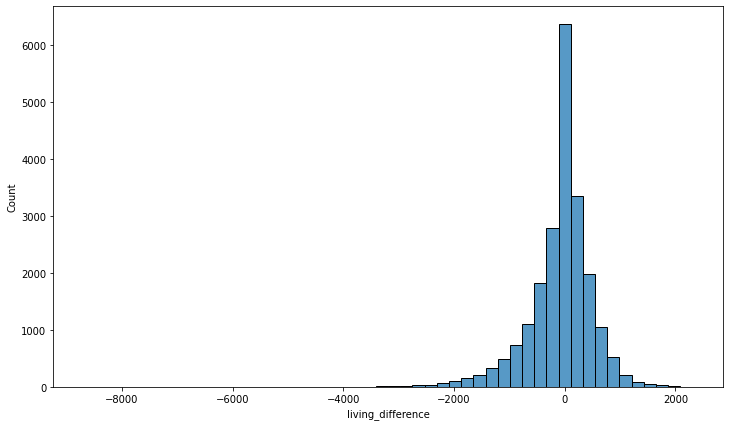

In [74]:
plt.figure(figsize=(12,7))
df["living_difference"] = df["living_measure15"] - df["living_measure"]
sns.histplot(data=df,x="living_difference",bins=50)

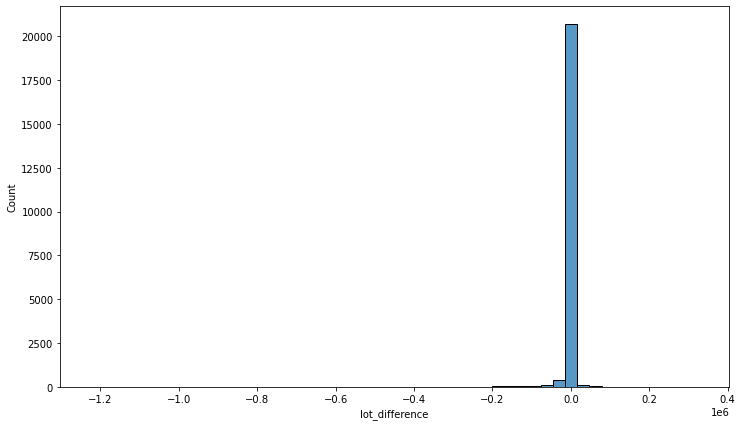

In [75]:
plt.figure(figsize=(12,7))
df["lot_difference"] = df["lot_measure15"] - df["lot_measure"]
sns.histplot(data=df,x="lot_difference",bins=50)

- Indeed some properities have seen a change in living space due to renovations.
- As a result, some properties have increased in living space and some have decreased.
- Most properties have not seen a change in lot space. This makes sense since most households do not have the capacity to buy or sell part of their land.

- "total_area" is simply the sum of the living space and lot space. Therefore the difference between these measuresments should be 0.

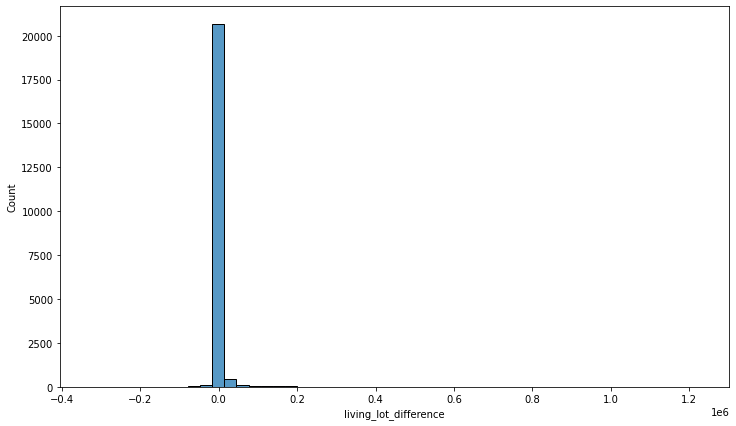

In [76]:
plt.figure(figsize=(12,7))
df["living_lot_difference"] = df["total_area"] - df["living_measure15"] - df["lot_measure15"]
sns.histplot(data=df,x="living_lot_difference",bins=50)

- There seems to be a few discrepencies because the numbers do not entirely match up.
- Maybe this is because "total_area" was tied to the old measurements.
- Regardless we will drop "total_area" since we have the values for living space and lot size.

In [77]:
df.drop("total_area",axis=1,inplace=True)

- "living_measure15" is simply the sum of the "ceil_measure" and "basement_measure". Therefore the difference between these measuresments should be 0.

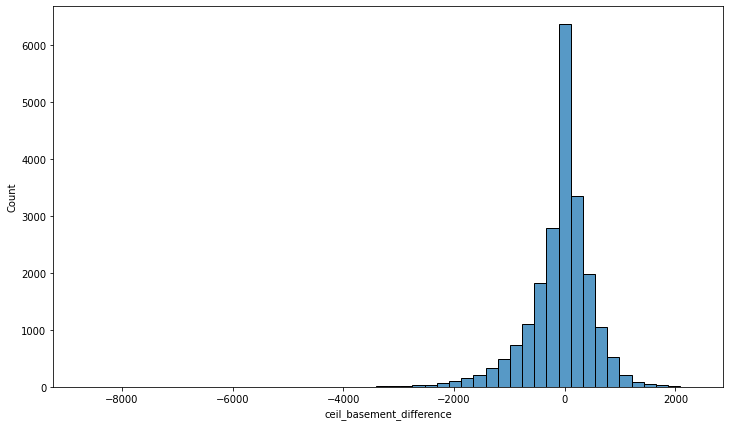

In [78]:
plt.figure(figsize=(12,7))
df["ceil_basement_difference"] = df["living_measure15"] - df["ceil_measure"] - df["basement"]
sns.histplot(data=df,x="ceil_basement_difference",bins=50)

- Unfortunately there seems to be some differences between these measurements. This might be because the ceil_measure and basement measure are from the original measurements when the house was built.
- Ideally we want to keep ceil_measure and basement.Therefore we will use data preprocessing to match these measurements with the measurements from 2015.

In [79]:
# The difference between the 2015 measurement with the original measurement as a ratio
df["living_difference"] = df["living_measure15"] / df["living_measure"] 

# Estimating new measurements for ceil and basement based on ratio
df["ceil_measure15"] = df["ceil_measure"] * df["living_difference"]
df["basement_measure15"] = df["basement"] * df["living_difference"]

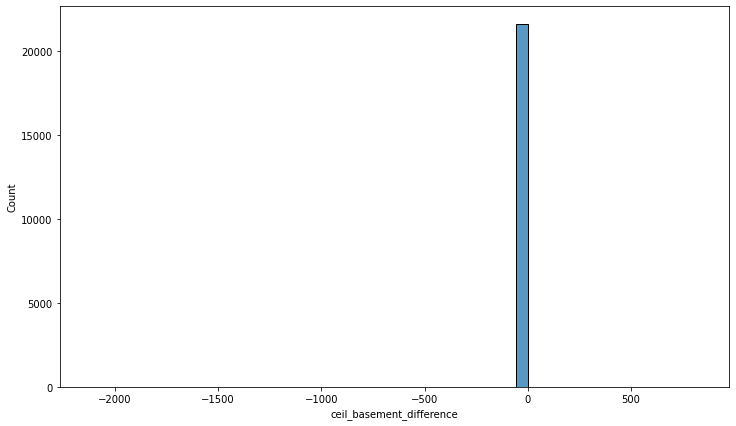

In [80]:
# Checking to see if everything matches

plt.figure(figsize=(12,7))
df["ceil_basement_difference"] = df["living_measure15"] - df["ceil_measure15"] - df["basement_measure15"]
sns.histplot(data=df,x="ceil_basement_difference",bins=50)

- Now that the sum of "ceil_measure15" and "basement_measure15" equal "living_measure15" we can drop this feature.
- We will also drop the other features which we don't need for the model.

In [81]:
# Drop features we created for the purpose of comparing measurements
df.drop(["living_measure","lot_measure","ceil_measure","basement","living_measure15","living_difference",
         "lot_difference","living_lot_difference","ceil_basement_difference"],axis=1,inplace=True)

### Outlier detection

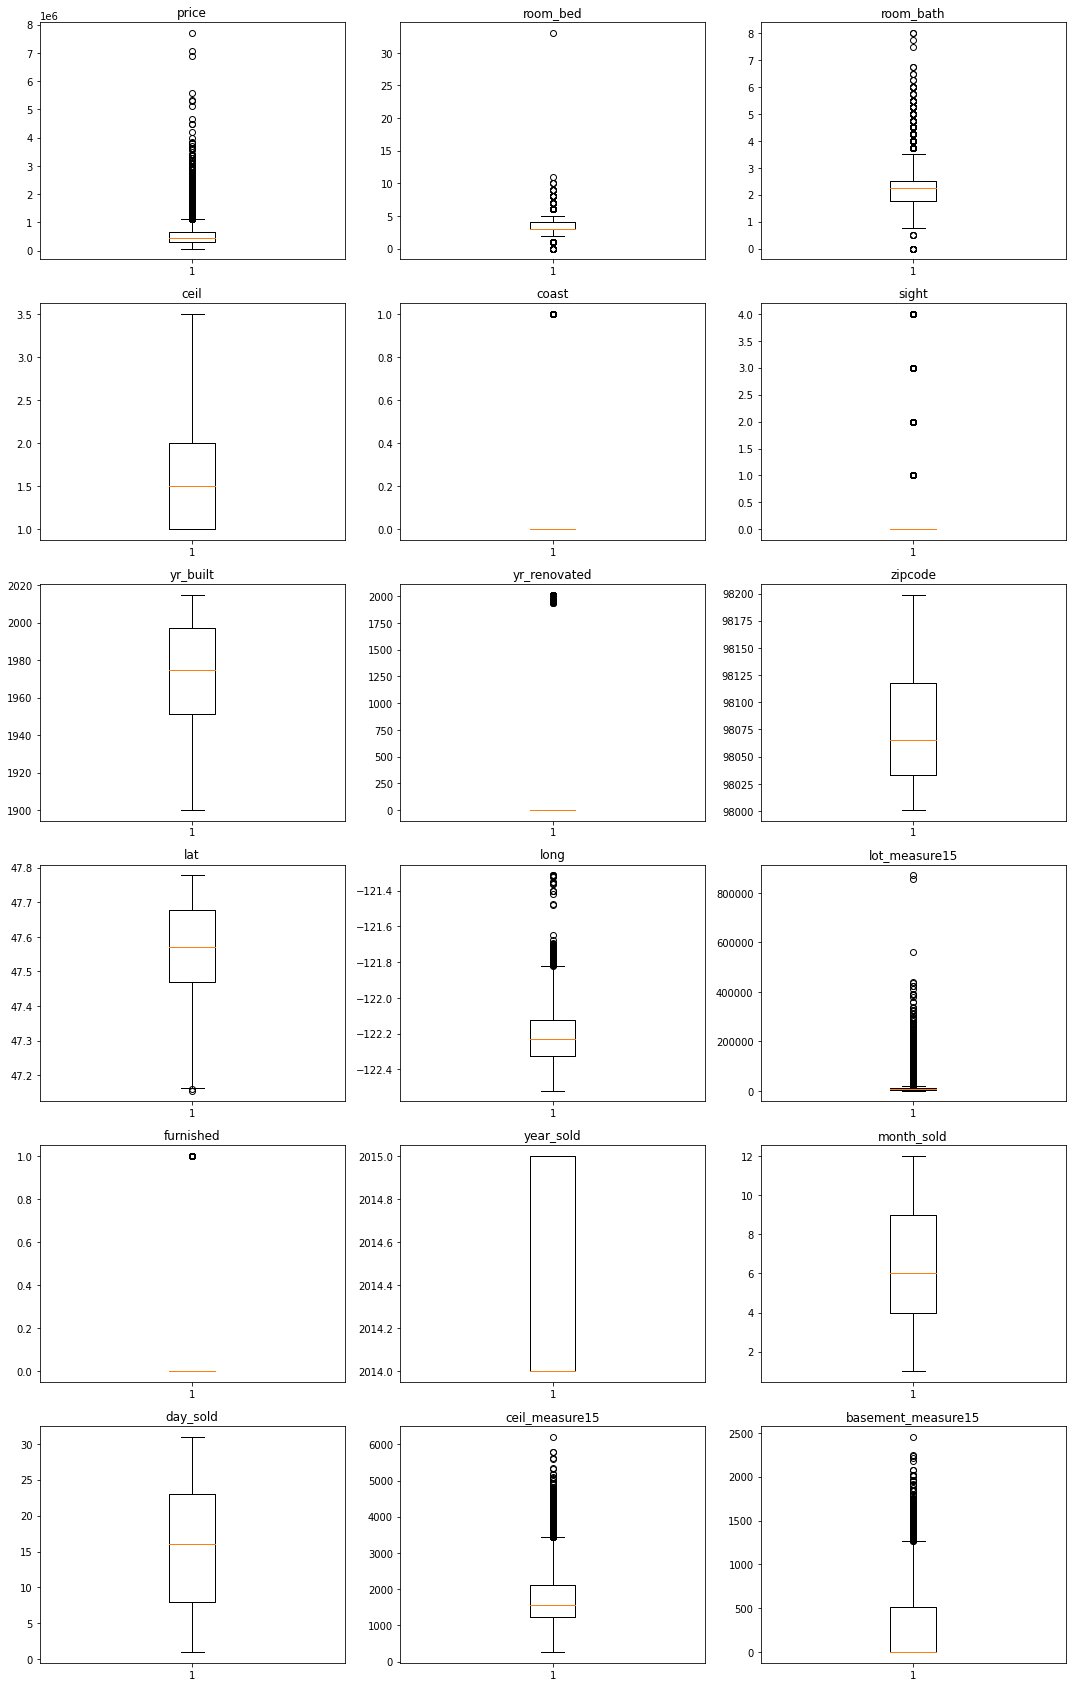

In [82]:
# Checking for outliers
out_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data.
- To make the model more accurate we will treat these outliers. 
- Features "coast", "sight", and "furnished" are continous data and will be treated differently.
- Feature "yr_renovated" will also be treated differently to make sure the data isn't lost
- Feature "price" will not be treated as it is the target variable

In [83]:
# TREAT OUTLIERS

def treat_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [84]:
treat_out_cols = ["room_bed","room_bath","lat","long","lot_measure15","ceil_measure15","basement_measure15"]

df = treat_outliers_all(df,treat_out_cols)

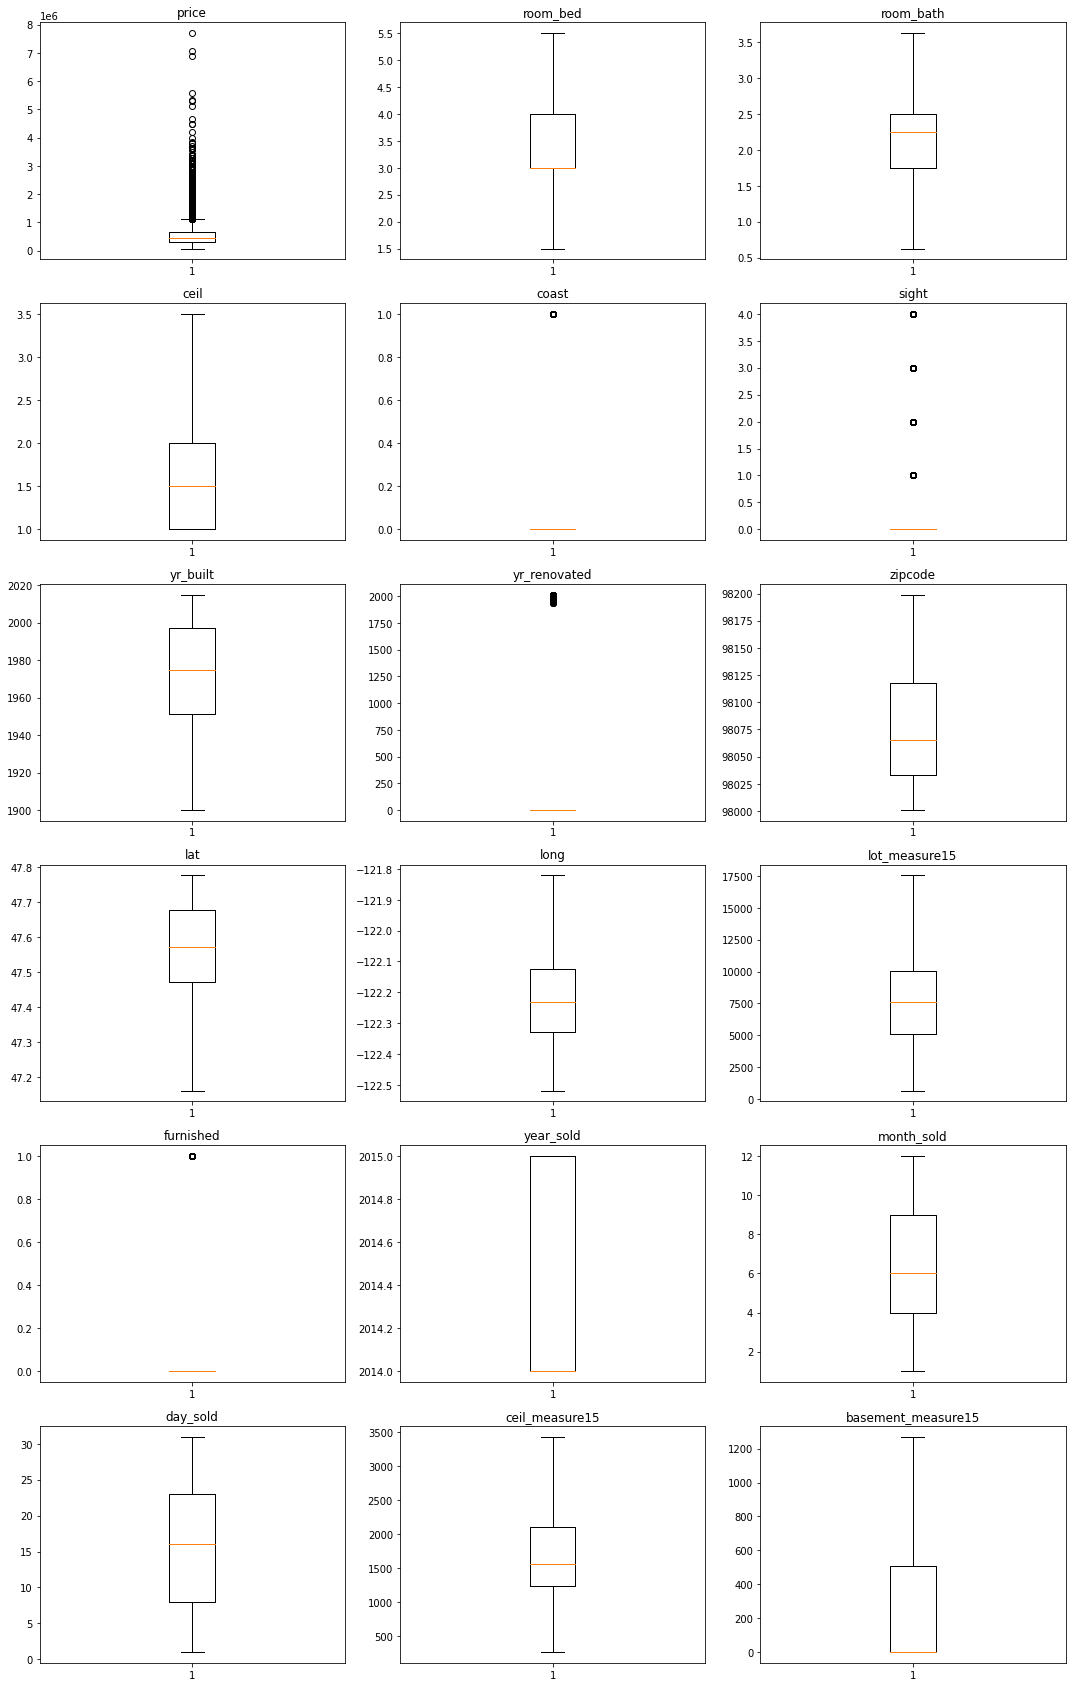

In [85]:
# Re-checking outliers
out_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [86]:
# Treating yr_renovated

# Converting years into decades to reduce the number of unique variables 
yr_renovated_decade = {0:"Not renovated", 1934:"1930s", 1940:"1940s", 1944:"1940s", 1945:"1940s", 1946:"1940s", 1948:"1940s",
                       1950:"1950s", 1951:"1950s", 1953:"1950s", 1954:"1950s", 1955:"1950s", 1956:"1950s",
                       1957:"1950s", 1958:"1950s", 1959:"1950s", 1960:"1960s", 1962:"1960s", 1963:"1960s",
                       1964:"1960s", 1965:"1960s", 1967:"1960s", 1968:"1960s", 1969:"1960s", 1970:"1970s",
                       1971:"1970s", 1972:"1970s", 1973:"1970s", 1974:"1970s", 1975:"1970s", 1976:"1970s", 
                       1977:"1970s", 1978:"1970s", 1979:"1970s", 1980:"1980s", 1981:"1980s", 1982:"1980s",
                       1983:"1980s", 1984:"1980s", 1985:"1980s", 1986:"1980s", 1987:"1980s", 1988:"1980s",
                       1989:"1980s", 1990:"1990s", 1991:"1990s", 1992:"1990s", 1993:"1990s", 1994:"1990s",
                       1995:"1990s", 1996:"1990s", 1997:"1990s", 1998:"1990s", 1999:"1990s", 2000:"2000s",
                       2001:"2000s", 2002:"2000s", 2003:"2000s", 2004:"2000s", 2005:"2000s", 2006:"2000s",
                       2007:"2000s", 2008:"2000s", 2009:"2000s", 2010:"2010s", 2011:"2010s", 2012:"2010s",
                       2013:"2010s", 2014:"2010s", 2015:"2010s"}
df["decade_renovated"] = df["yr_renovated"].map(yr_renovated_decade)

In [87]:
#drop old "yr_renovated"
df.drop("yr_renovated",axis=1,inplace=True)

- Now that the data has been cleaned, we will do further Exploratory Data Analaysis to gain better insights into the data .

### Further Exploratory Data Analysis

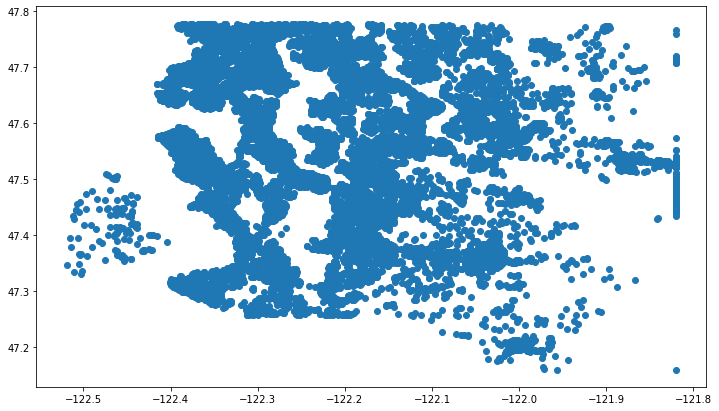

In [88]:
# Longitude and Latitude coordinates showing King County, Washington, USA.
plt.figure(figsize=(12,7))
plt.scatter(x=df['long'], y=df['lat'])
plt.show()

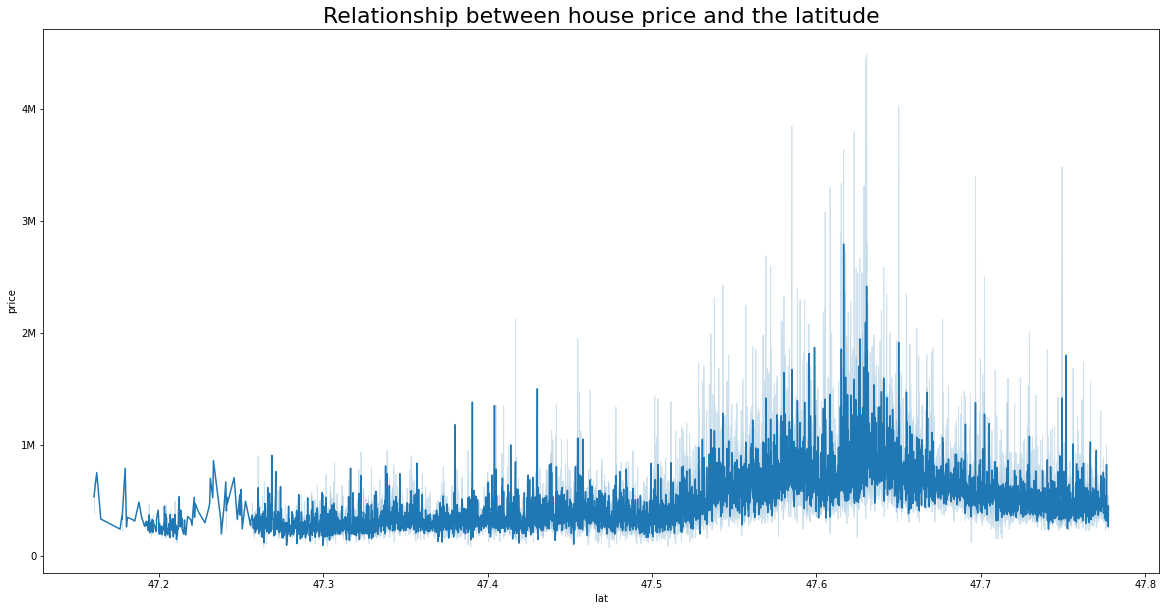

In [89]:
# Correlation between price and latitude
plt.figure(figsize=(20,10))
sns.lineplot(data=df.sort_values("lat",ascending=True),x="lat",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and the latitude", fontsize=22)
plt.show()

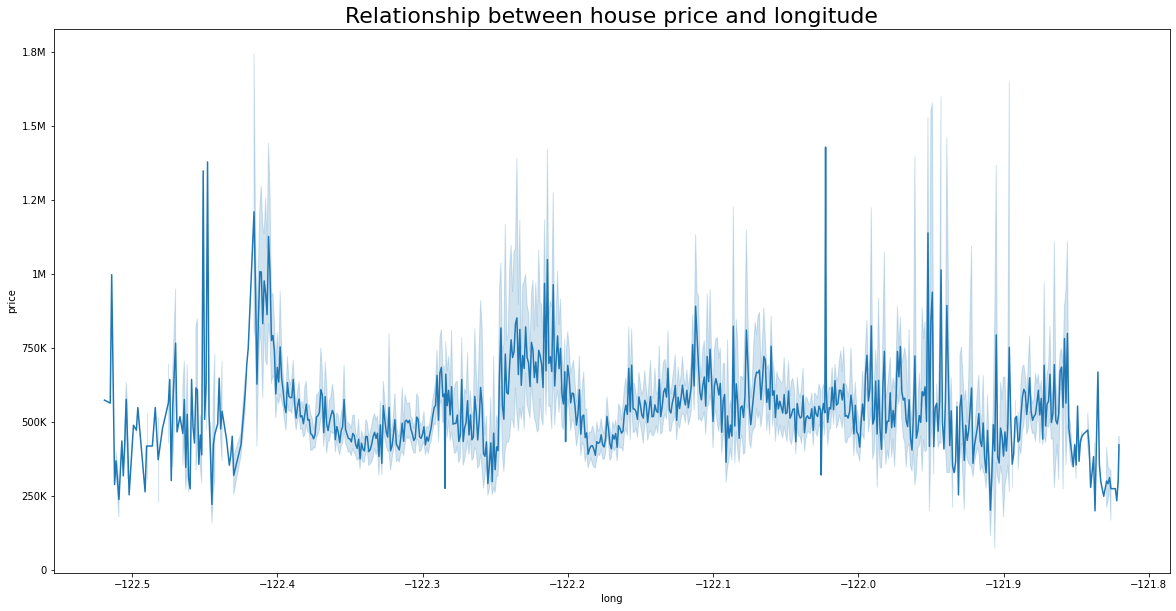

In [90]:
# Correlation between price and longitude
plt.figure(figsize=(20,10))
sns.lineplot(data=df.sort_values("long",ascending=True),x="long",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and longitude", fontsize=22)
plt.show()

- We can see that house price is different depending on the location

Text(0.5, 1.0, 'Relationship between house price and lot size')

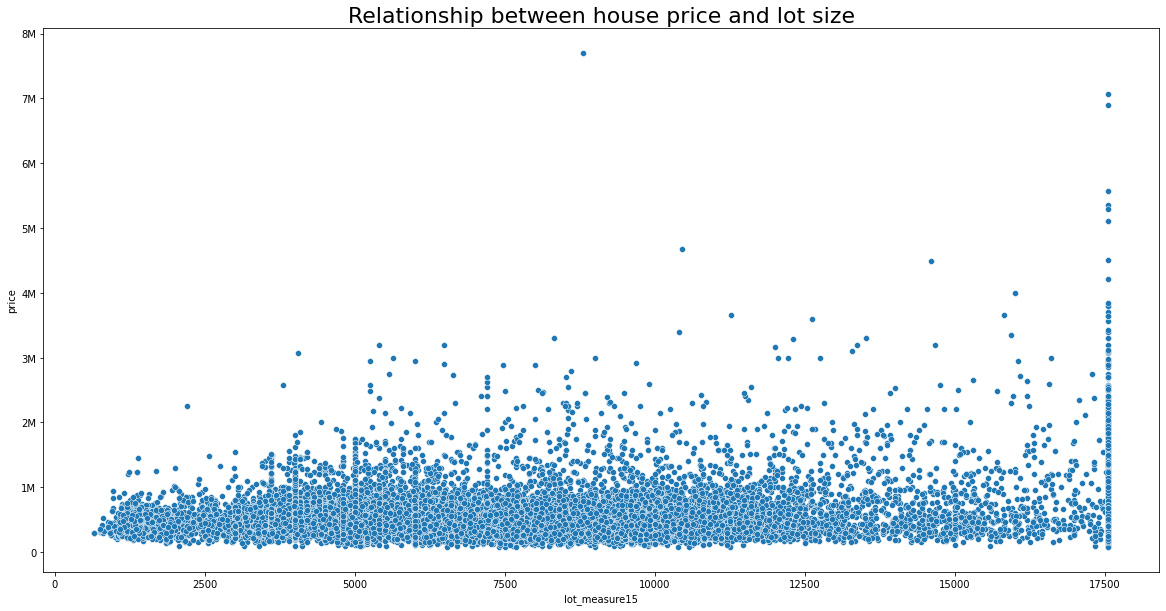

In [91]:
# Correlation between price and lot size
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x="lot_measure15",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and lot size", fontsize=22)

- No significant relationship between lot size and house price

Text(0.5, 1.0, 'Relationship between house price and year sold')

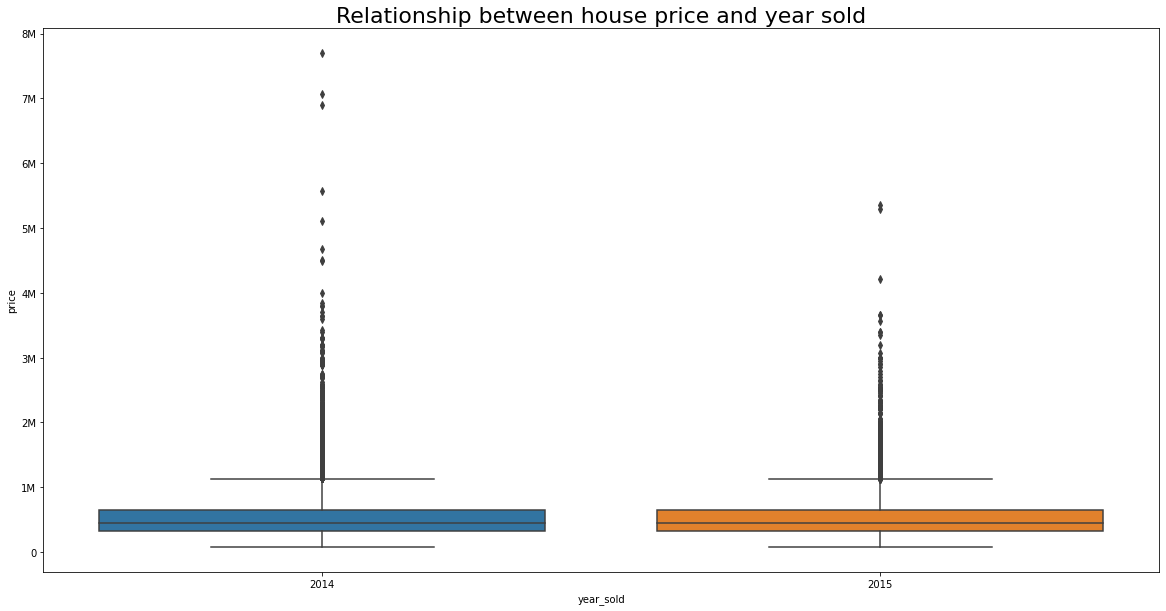

In [92]:
# Correlation between price and year sold
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="year_sold",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and year sold", fontsize=22)

Text(0.5, 1.0, 'Relationship between house price and month sold')

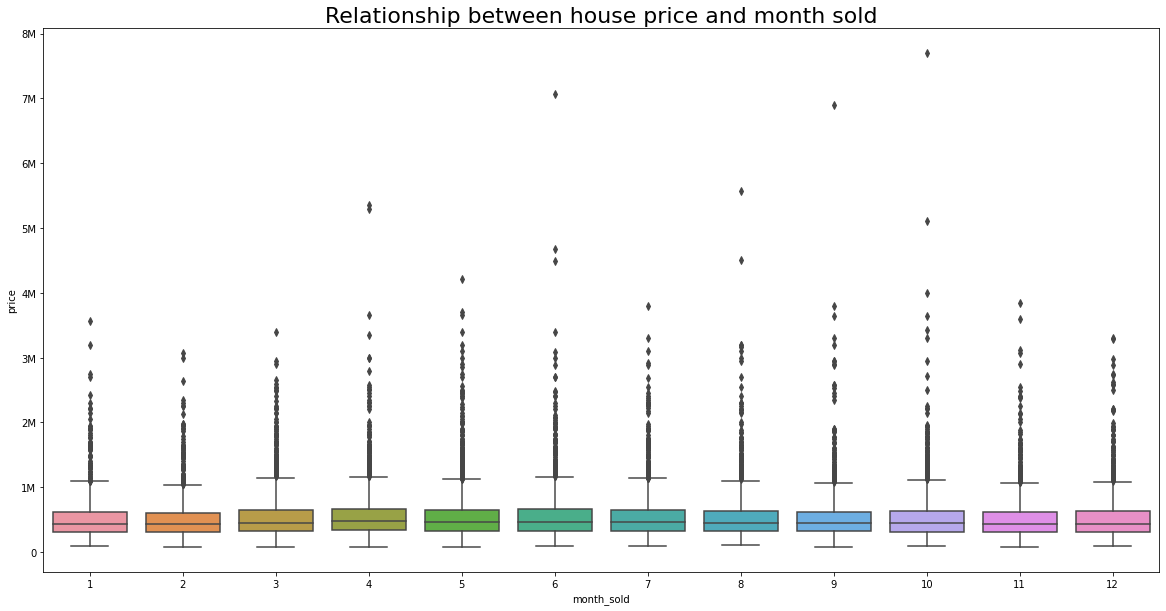

In [93]:
# Correlation between price and month sold
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="month_sold",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and month sold", fontsize=22)

Text(0.5, 1.0, 'Relationship between house price and day sold')

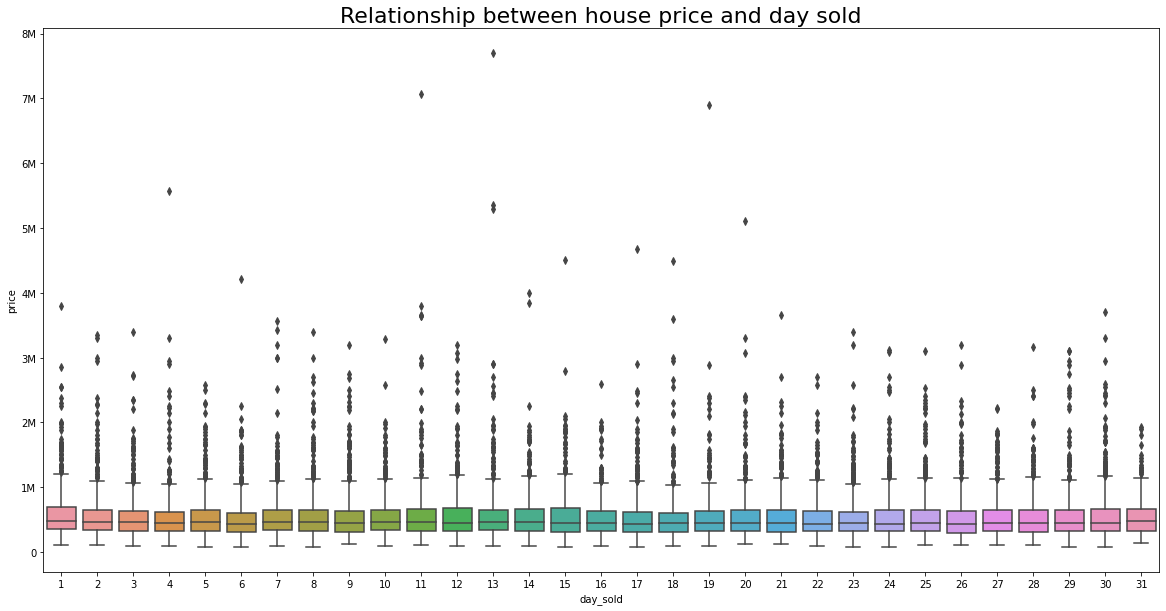

In [94]:
# Correlation between price and day sold
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="day_sold",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and day sold", fontsize=22)

- There is no clear relationship between the year, month, or day the house was sold versus the house price.
- This is probably because the dataset is limited to houses sold in 2014 and 2015
- There are many outliers beyond the max whiskers

In [95]:
df["if_basement"] = df.basement_measure15.astype(bool)

Text(0.5, 1.0, 'Relationship between house price and basement')

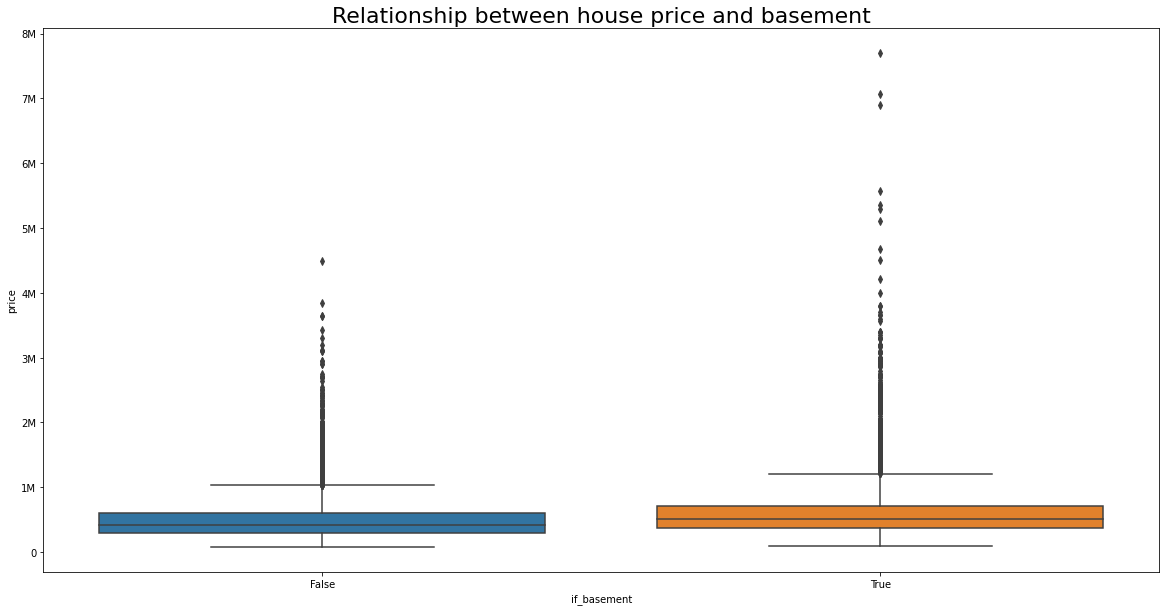

In [96]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="if_basement",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and basement", fontsize=22)

- Houses with a basement have a slightly higher house price.
- There are many outliers beyond the max whiskers

In [97]:
# Droping new basement feature
df.drop("if_basement",axis=1,inplace=True)

Text(0.5, 1.0, 'Relationship between house price and house size (excluding basement)')

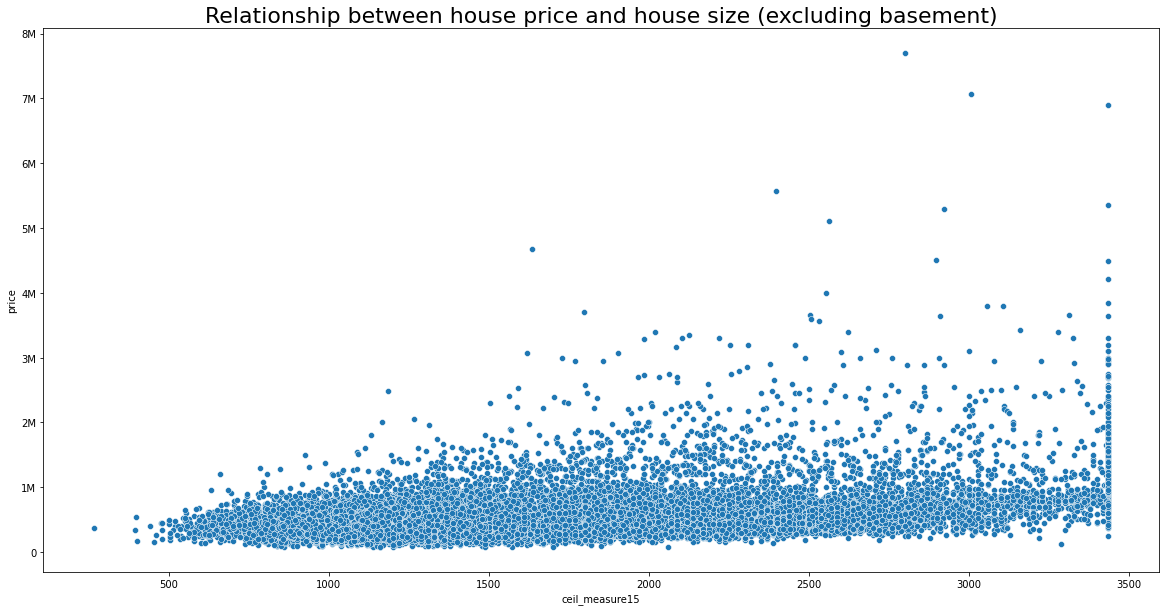

In [98]:
# Correlation between price and ceil measure
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x="ceil_measure15",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and house size (excluding basement)", fontsize=22)

- Slight positive relationship between house price and house size (excluding basement) 

Text(0.5, 1.0, 'Relationship between house price and the number of viewings')

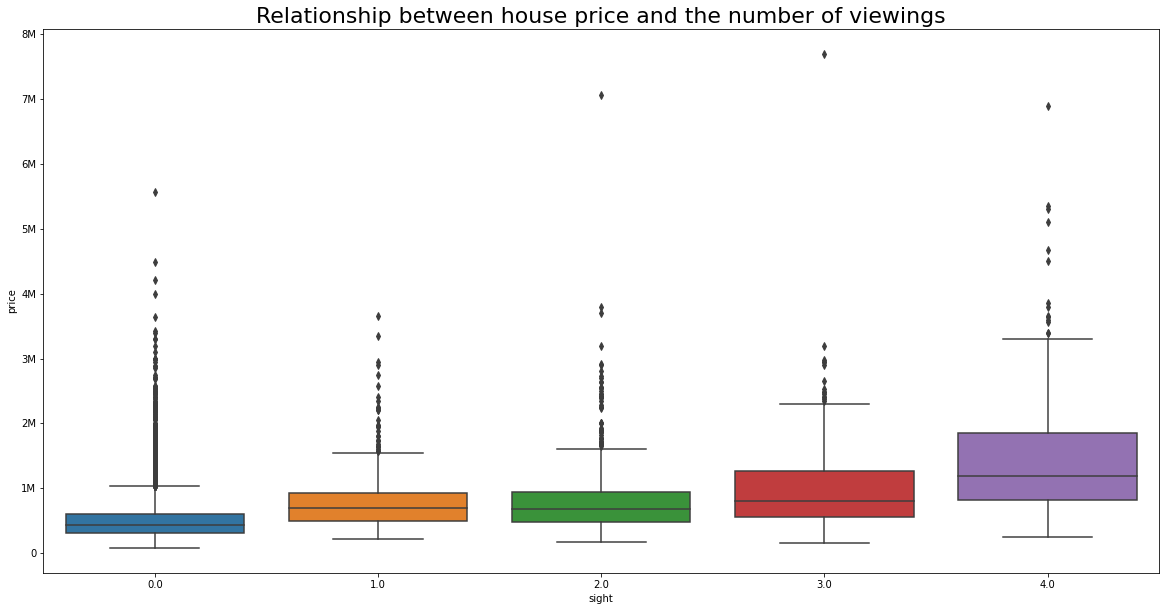

In [99]:
# Correlation between price and sight
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="sight",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and the number of viewings", fontsize=22)

- Houses with more viewings have a higher house price.
- There are many outliers beyond the max whiskers

Text(0.5, 1.0, 'Relationship between house price and rank')

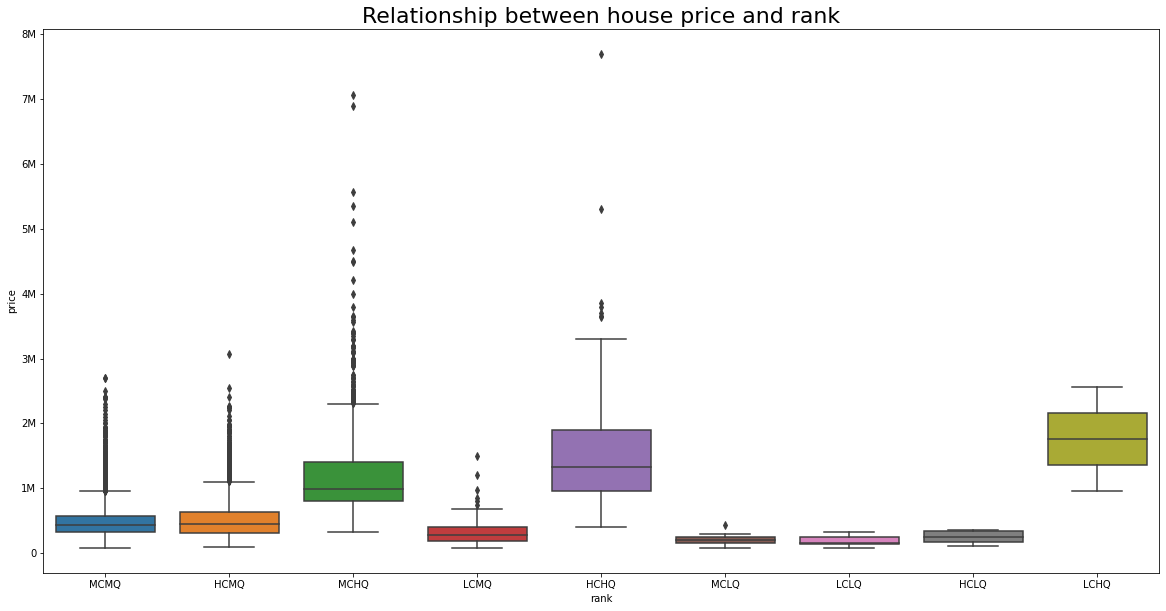

In [100]:
# Correlation between price and rank
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="rank",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and rank", fontsize=22)

- House price is different depending on the ranking
- On average, houses priced the highest were ranked "HQ" (High quality)
- Houses priced the lowest were ranked "LQ" (Low quality)
- Quality seems to be a clearer indicator of house price than condition. 
- There are many outliers beyond the max whiskers

Text(0.5, 1.0, 'Relationship between house price and year renovated')

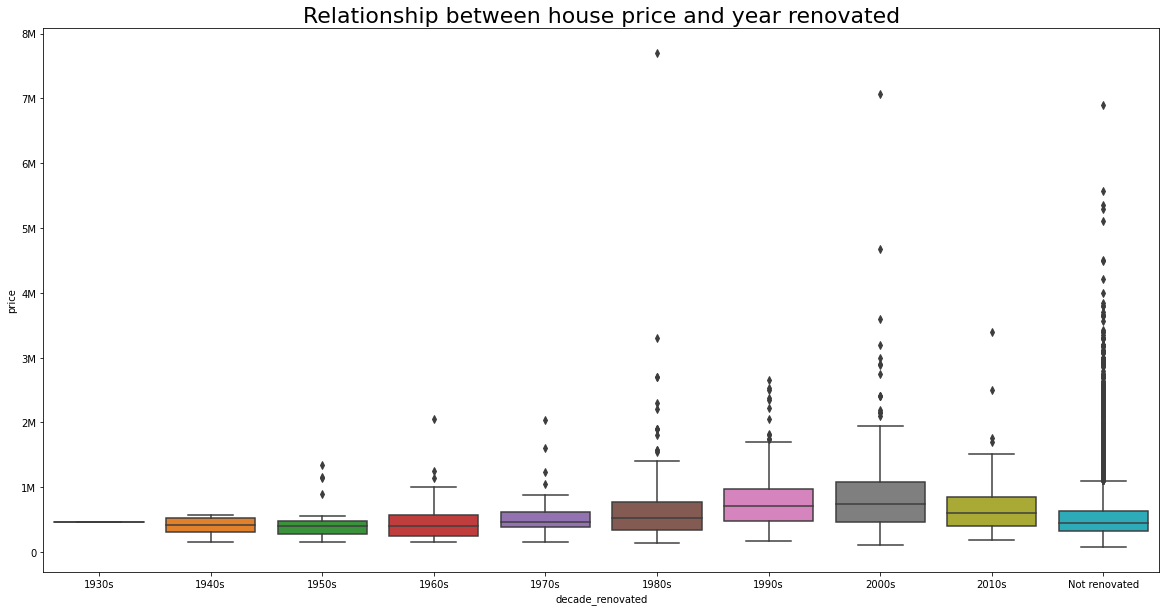

In [101]:
# Correlation between price and year renovated
plt.figure(figsize=(20,10))
sns.boxplot(data=df.sort_values("decade_renovated",ascending=True),x="decade_renovated",y="price")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Relationship between house price and year renovated", fontsize=22)

- On average, houses renovated in the latter years (1980s - 2010s) have a higher house price.
- Also, houses renovated between 1980s - 2010s have a higher house price than none renovated houses.
- However, there are many outliers beyond the max whiskers. Especially for the none renovated houses

### Dummy variables and Summary

In [102]:
# Converting features "sight" and "rank" to dummy variable for model

df = pd.get_dummies(df, columns=["sight","rank","decade_renovated"], drop_first=True) 

In [103]:
# Summary of the data after data pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           21613 non-null  int64  
 1   room_bed                        21613 non-null  float64
 2   room_bath                       21613 non-null  float64
 3   ceil                            21613 non-null  float64
 4   coast                           21613 non-null  int64  
 5   yr_built                        21613 non-null  int64  
 6   zipcode                         21613 non-null  int64  
 7   lat                             21613 non-null  float64
 8   long                            21613 non-null  float64
 9   lot_measure15                   21613 non-null  float64
 10  furnished                       21613 non-null  float64
 11  year_sold                       21613 non-null  int64  
 12  month_sold                      

**Summary of the data after data pre-processing**
- We now have a total of 37 columns, 14 more than the original dataset. All columns are numerical and there are no null values.

## Analytical Approach

- We will be running a regression model to predict price.
- The data will be split into 2 groups. A train set and a test set. 70% of the data will be used for the train set and 30% for the test set. These ratio’s might be adjusted to improve the model during the model tunning phase.


- We will try 3 different models for this project. The model that predicts price best will be selected for production. Here are the three models we will run:
    - **Linear regression** (the most popular model for running regression models)
    - **Random forest regression** (an ensemble learning technique useful for creating generalized models)
    - **XGBoost regression** (an ensemble learning technique that is effective with large datasets)
    

- Models will be run one at a time. With each model we will use hyperparameter tuning to try and get the most out of our model. Hyperparameter tuning will be done multiple times until we are satisfied with the model. After that, we will run the next model.


- 3 measures will be calculated to determine the best regression model:
    - **Root Mean Squared Error** (measures how bad the model's prediction is when compared to actual observed values. A high RMSE is "bad" and a low RMSE is "good".) 
    - **Mean Absolute Error** (measures how accurate the model's prediction is and the amount of deviation from the actual values. A high MAE is "bad" and a low MAE is "good".)
    - **R-Squared** (measures how well the model's prediction fits the data. A high r-squared is "good" and a low r-squared is "bad".)
        - We will also look at **Adjusted R-Squared**. Adj. r-squared shows whether adding additional predictors improves the model or not. 
 

## Linear Regression

In [104]:
# Import libaries for modelling

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

# To help with model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Checking model performance

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
 

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
       },
        index=[0],
    )

    return df_perf

### OLS model and Linear Regression Assumptions
- Before we make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.


- We will be checking the following Linear Regression assumptions.
1. No Multicollinearity
2. Linearity of variables
3. Independance of error terms
4. Normality of error terms
5. No Heteroscedasticity

In [106]:
# split data
X = df.drop(["price"], axis = 1) # independant variables
y = df[["price"]] # dependant variables

In [107]:
# Add constant
X = sm.add_constant(X)

In [108]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)
    
print(X_train.shape, X_test.shape)

(15129, 37) (6484, 37)


In [109]:
# VIF MULTICOLLINEARITY TEST

# SCORES OF > 5 = multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
    return vif

In [110]:
checking_vif(df)

,feature,VIF
0,price,9.102165e+00
1,room_bed,2.551635e+01
2,room_bath,2.829995e+01
3,ceil,1.919205e+01
4,coast,1.629829e+00
5,yr_built,1.090600e+04
6,zipcode,5.409590e+06
7,lat,1.565832e+05
8,long,1.494375e+06
9,lot_measure15,7.439321e+00


- None of the features have a multicollinearity of 5 or more. Therefore the multicollinearity test is satisfied

In [111]:
# Dealing with high p-values

olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     791.1
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:54:23   Log-Likelihood:            -2.0745e+05
No. Observations:               15129   AIC:                         4.150e+05
Df Residuals:                   15093   BIC:                         4.153e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- While checking for high p-values we also ran our first model.
- The OLS model shows Adj. R-squared of 0.646.
- There are 3 features with a p-value of > 0.05. "lot_measure15", "month_sold", and " "rank_LCHQ". These will need to be dropped. 

In [112]:
# REMOVING HIGH p-values USING FOR LOOP


cols = X_train.columns.tolist()
max_p_value = 1

while len(cols) > 0:
    X_train_aux = X_train[cols]
    model = sm.OLS(y_train, X_train_aux).fit()
    p_values = model.pvalues
    max_p_value = max(p_values)
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'room_bed', 'room_bath', 'ceil', 'coast', 'yr_built', 'zipcode', 'lat', 'long', 'furnished', 'year_sold', 'day_sold', 'ceil_measure15', 'basement_measure15', 'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'rank_HCLQ', 'rank_HCMQ', 'rank_LCLQ', 'rank_LCMQ', 'rank_MCHQ', 'rank_MCLQ', 'rank_MCMQ', 'decade_renovated_1940s', 'decade_renovated_1950s', 'decade_renovated_1960s', 'decade_renovated_1970s', 'decade_renovated_1980s', 'decade_renovated_1990s', 'decade_renovated_2000s', 'decade_renovated_2010s', 'decade_renovated_Not renovated']


In [113]:
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

In [114]:
olsmod2 = sm.OLS(y_train, X_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     865.0
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:54:23   Log-Likelihood:            -2.0746e+05
No. Observations:               15129   AIC:                         4.150e+05
Df Residuals:                   15096   BIC:                         4.152e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- Features "lot_measure15", "month_sold", "rank_LCHQ" were removed before they had a p-value of > 0.05.
- Adjusted r-squared is unchanged

In [115]:
# Test for linearity and independance

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

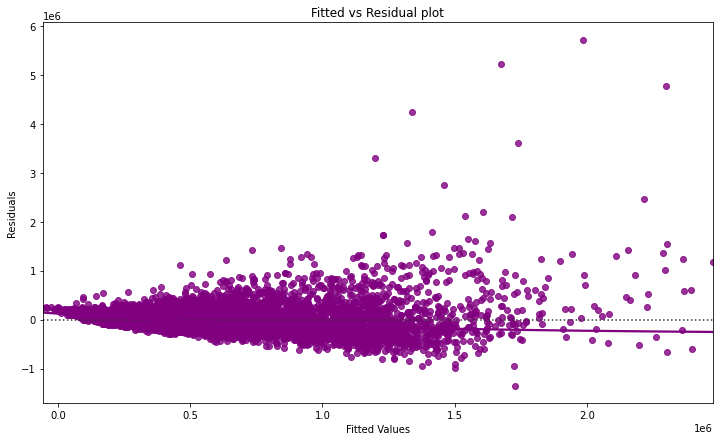

In [116]:
# let's plot the fitted values vs residuals

plt.figure(figsize=(12,7))

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The mean residual only slightly decreases which means the test is satisfied.
- However, the spread of the residuals is increasing as the fitted values change. This probably means that the data is heteroscedastic. This will be treated during the heteroscedasticity test.

In [117]:
# Test for Normality using the Shapiro-Wilk test
from scipy import stats

stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.7444878816604614, pvalue=0.0)

- p-value <0.05
- The assumption is satisfied.

In [118]:
# Test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train2)
lzip(name, test)

[('F statistic', 1.3498942501855873), ('p-value', 6.608281134108054e-39)]

- The p-value is smaller than 0.05. Therefore the assumption is not satisfied.  

- This was to be expected based on the observation made during the linearity and independance test. We will therefore need to treat the data in order to satisfy the assumption.

- We will try to treat heteroscedasticity by performing a log transformation on the dependant variable "price".

### Log transformation and Linear Regression Assumptions

In [119]:
df2 = df.copy()

In [120]:
# Log transformation
df2['price_log'] = np.log(df2['price'])

In [121]:
# Drop original price column
df2.drop("price",axis=1,inplace=True)

In [122]:
# split data
X2 = df2.drop(["price_log"], axis = 1) # independant variables
y2 = df2[["price_log"]] # dependant variables

In [123]:
# Add constant
X2 = sm.add_constant(X2)

In [124]:
# Train test split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.30, random_state=1)
    
print(X2_train.shape, X2_test.shape)

(15129, 37) (6484, 37)


In [125]:
olsmod3 = sm.OLS(y2_train, X2_train).fit()

In [126]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y2_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

In [127]:
# Test for homoscedasticity

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X2_train)
lzip(name, test)

[('F statistic', 1.014947963482154), ('p-value', 0.25988705461481637)]

- p-value is > 0.05. Therefore the assumption is satisfied. The data is homoscedastic.

- Let's recheck the other tests to make sure all assumptions are satisfied

In [128]:
# Test for multicollinearity
checking_vif(df2)

,feature,VIF
0,room_bed,2.552808e+01
1,room_bath,2.921323e+01
2,ceil,1.946176e+01
3,coast,1.601430e+00
4,yr_built,1.104086e+04
5,zipcode,5.399772e+06
6,lat,2.004725e+05
7,long,1.484928e+06
8,lot_measure15,7.451197e+00
9,furnished,2.742590e+00


In [129]:
# Test for high p-values
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:54:40   Log-Likelihood:                -1923.7
No. Observations:               15129   AIC:                             3919.
Df Residuals:                   15093   BIC:                             4194.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- Using log transformation on price had a positive impact on the model. The OLS model now has a adj. R-squared of 0.729. This is an improvement of 0.083.
- Only feature "rank_LCHQ" has a p-value > 0.05. We will therefore drop this feature and keep the others for the final model.

In [130]:
# dropping rank_LCHQ
X2_train2 = X2_train.drop(["rank_LCHQ"], axis = 1)
X2_test2 = X2_test.drop(["rank_LCHQ"], axis = 1)

In [131]:
olsmod4 = sm.OLS(y2_train, X2_train2).fit()

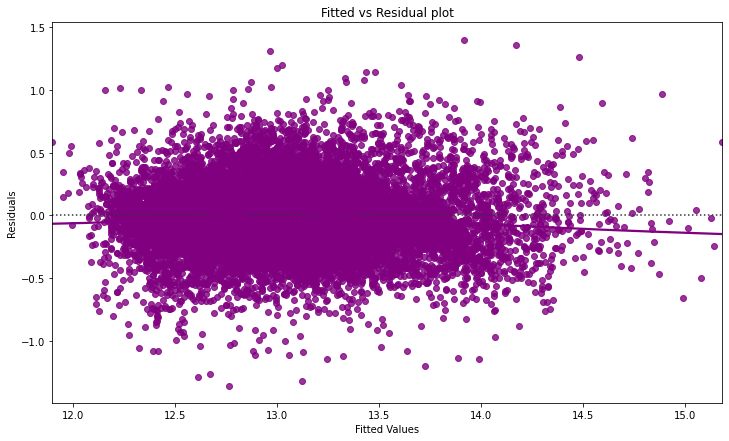

In [132]:
# let's plot the fitted values vs residuals

plt.figure(figsize=(12,7))

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- We can see that the residuals are alot more spread out and balanced. This is ideal for the model.

In [133]:
# Test for Normality using the Shapiro-Wilk test

stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9941995739936829, pvalue=4.385589372181167e-24)

- p-value <0.05
- The assumption is satisfied.

- All assumption are satisfied. We can now check the performance of the model

In [134]:
pred = olsmod4.predict(X2_test2)

In [173]:
# checking model performance on train set
print("Training Performance\n")
olsmod4_train_perf = model_performance_regression(olsmod4, X2_train2, y2_train)
olsmod4_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.274784,0.212359,0.729449,0.728803


In [174]:
# checking model performance on test set
print("Test Performance\n")
olsmod4_test_perf = model_performance_regression(olsmod4, X2_test2, y2_test)
olsmod4_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.313053,0.214163,0.642201,0.640203


**Observation**

- The r-squared, RMSE and MAE for the training performance and the test performance are very similiar. However if you look at the R-squared, the model is slightly overfitting.
- R-squared on the test set is 0.642 and adjusted R-squared on the test set is 0.640
- MAE is 0.214. This means the model can predict normalized used price within a mean error of 0.214 dollars on the test data.
- RMSE on the test set is 0.313.


- We will now attempt to improve the model.

### Model tunning

In [137]:
# Creating LinearRegression model
lr = LinearRegression().fit(X2_train2, y2_train)
lr_pred = lr.predict(X2_test2)

In [175]:
# checking model performance on train set 
print("Training Performance\n")
lr_train_perf = model_performance_regression(lr, X2_train2, y2_train)
lr_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.274784,0.212359,0.729449,0.728803


In [176]:
# checking model performance on test set 
print("Test Performance\n")
lr_test_perf = model_performance_regression(lr, X2_test2, y2_test)
lr_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.274743,0.212301,0.724415,0.722876


In [140]:
# Using KMeans to improve the models performance
X3 = X2.copy()
y3 = y2.copy()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X3)
X3["price_cluster"] = kmeans.predict(X3)

In [141]:
# Add constant
X3 = sm.add_constant(X3)

In [142]:
# Train test split

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.30, random_state=1)
    
print(X3_train.shape, X3_test.shape)

(15129, 38) (6484, 38)


In [143]:
X3_train2 = X3_train.drop(["rank_LCHQ"], axis = 1)
X3_test2 = X3_test.drop(["rank_LCHQ"], axis = 1)

In [178]:
# Creating LinearRegression model
lr2 = LinearRegression().fit(X3_train2, y3_train)
lr2_pred = lr2.predict(X3_test2)

In [179]:
# checking model performance on training set 
print("Training Performance\n")
lr2_train_perf = model_performance_regression(lr2, X3_train2, y3_train)
lr2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.270356,0.208188,0.738098,0.737456


In [180]:
# checking model performance on test set 
print("Test Performance\n")
lr2_test_perf = model_performance_regression(lr_2, X3_test2, y3_test)
lr2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.270213,0.20833,0.733427,0.731897


**Observation**

- Using LinearRegression instead of the basic OLS model helped improve the model's performance.
- Different tunning methods were used to try an improve the linearregression model. Cross_validation, GridSearch, RandomSearch, Quantiletransformer, adjusting train_test_split ratio, and Kmeans. But only Kmeans (cluster = 3) slightly improved the model. 


- **R-squared** on the test set is 0.733 and Adjusted R-squared on the test performed 0.731. An improvement of 0.091.
- **MAE** is 0.208. An improvement of 0.006.
- **RMSE** is 0.270. An improvement of 0.043.


- We will now try modelling using Random Forest and XGBoost

## Random Forest Regression

### First model

In [147]:
# Creating RandomForest model
rf = RandomForestRegressor().fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [181]:
# checking model performance on training set 
print("Training Performance\n")
rf_train_perf = model_performance_regression(rf, X_train, y_train)
rf_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,62588.905756,30981.76171,0.970989,0.970918


In [182]:
# checking model performance on test set 
print("Test Performance\n")
rf_test_perf = model_performance_regression(rf, X_test, y_test)
rf_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,150076.117349,80453.957276,0.832866,0.831907


**Observation**

- The difference between the training performance and the test performance is very large and the model is overfitting the data. While the score for adj. R-squared is high, the score RMSE and MAE are far too large.

- We will now go ahead and tune the model to improve its performance.

### Model tunning

In [150]:
# Using "price_log" instead of "price" and removing feature "rank_LCHQ"

# Creating RandomForest model
rf2 = RandomForestRegressor().fit(X2_train2, y2_train)
rf2_pred = rf2.predict(X2_test2)

In [183]:
# checking model performance on training set 
print("Training Performance\n")
rf2_train_perf = model_performance_regression(rf2, X2_train2, y2_train)
rf2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.075756,0.053883,0.979436,0.979387


In [184]:
# checking model performance on test set 
print("Test Performance\n")
rf2_test_perf = model_performance_regression(rf2, X2_test2, y2_test)
rf2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.199724,0.142717,0.854366,0.853553


In [153]:
# Using Kmeans (cluster = 3)

X4 = X3.copy()
y4 = y3.copy()

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.30, random_state=1)

In [185]:
# Creating RandomForest model
rf3 = RandomForestRegressor().fit(X4_train, y4_train)
rf3_pred = rf3.predict(X4_test)

In [186]:
print("Training Performance\n")
rf3_train_perf = model_performance_regression(rf3, X4_train, y4_train)
rf3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.075205,0.053761,0.979734,0.979683


In [187]:
# checking model performance on test set 
print("Test Performance\n")
rf3_test_perf = model_performance_regression(rf3, X4_test, y4_test)
rf3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.199309,0.142205,0.854971,0.854116


**Hyperparamter tunning**

- We will start by tunning the model using RandomizedSearchCV. Once we have narrowed down the range of possibilities for the best model, we will use GridSearchCV to predict the best model.

In [158]:
model = RandomForestRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'bootstrap': [True, False],
                 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600, 700, 800]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X4_train,y4_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} with CV score=0.853997146963702:


In [188]:
rf4=RandomForestRegressor(
    bootstrap=False,
    max_depth=100,
    max_features= "sqrt",
    n_estimators=600,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=1)
rf4.fit(X4_train,y4_train)
rf4_pred = rf4.predict(X4_test)

In [189]:
# Checking model performance on training set
print("Training Performance\n")
rf4_train_perf = model_performance_regression(rf4, X4_train, y4_train)
rf4_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.089242,0.064095,0.971463,0.971391


In [190]:
# checking model performance on test set 
print("Test Performance\n")
rf4_test_perf = model_performance_regression(rf4, X4_test, y4_test)
rf4_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.197463,0.14141,0.857644,0.856805


In [166]:
model = RandomForestRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'bootstrap': [False],
                 'max_depth': [80, 90, 100],
                 'max_features': [2,3],
                 'min_samples_leaf': [4, 5],
                 'min_samples_split': [8, 10],
                 'n_estimators': [100, 200, 600]}

#Calling RandomizedSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1, cv=5, verbose=2)

#Fitting parameters in RandomizedSearchCV
grid_cv.fit(X4_train,y4_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 600} with CV score=0.7930919555135999:


In [191]:
rf5=RandomForestRegressor(
    bootstrap=False,
    max_depth=80,
    max_features= 3,
    n_estimators=600,
    min_samples_leaf=4,
    min_samples_split=8,
    random_state=1)
rf5.fit(X4_train,y4_train)
rf5_pred = rf5.predict(X4_test)

In [192]:
# checking model performance on training set 
print("Training Performance\n")
rf5_train_perf = model_performance_regression(rf5, X4_train, y4_train)
rf5_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.193274,0.143111,0.866151,0.865814


In [193]:
# checking model performance on test set 
print("Test Performance\n")
rf5_test_perf = model_performance_regression(rf5, X4_test, y4_test)
rf5_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.234622,0.172979,0.799026,0.797841


In [194]:
# Final Adjustment of model

rf6=RandomForestRegressor(
    bootstrap=False,
    max_depth=80,
    max_features= 3,
    n_estimators=100,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=1)
rf6.fit(X4_train,y4_train)
rf6_pred = rf6.predict(X4_test)

In [195]:
# checking model performance on training set 
print("Training Performance\n")
rf6_train_perf = model_performance_regression(rf6, X4_train, y4_train)
rf6_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.206423,0.152556,0.84732,0.846935


In [196]:
# checking model performance on test set 
print("Test Performance\n")
rf6_test_perf = model_performance_regression(rf6, X4_test, y4_test)
rf6_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.238395,0.175481,0.792509,0.791286


**Observation**

- Using Hyper tunning had a significant impact on the model's performance.
- Model performed better than the linear regression model.
- Scores for all measurements improved.


- **R-squared** on the test set is 0.793 and adj. r-squared is 0.791. An improvement of 0.06.
- **MAE** is 0.175. An improvement of 0.033.
- **RMSE** is 0.238. An improvement of 0.032.

- We will now try modelling using XGBoost

## XGBoost Regression

### First model

In [197]:
# Creating RandomForest model
xgb = XGBRegressor().fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [198]:
# checking model performance on training set 
print("Training Performance\n")
xgb_train_perf = model_performance_regression(xgb, X_train, y_train)
xgb_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,147659.245948,86446.204939,0.83853,0.838134


In [199]:
# checking model performance on test set 
print("Test Performance\n")
xgb_test_perf = model_performance_regression(xgb, X_test, y_test)
xgb_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,159974.676653,91055.016548,0.810092,0.809002


**Observation**

- High scores for R-squared and Adj. R-squared. However, very low scores for RMSE and MAE.
- Therefore, this model is not accurate enough to be considered for the final model.

- We will now go ahead and tune the model to improve its performance.

### Model tunning

- Same as with the other two models, we will use log price and Kmeans (cluster = 3).

**Hyperparamter tunning**

- We will start by tunning the model using RandomizedSearchCV. Once we have narrowed down the range of possibilities for the best model, we will use GridSearchCV to predict the best model.

In [168]:
model = XGBRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600, 700, 800],
                 "scale_pos_weight" : [5,15],
                 "learning_rate": [0.01, 0.1, 0.3,0.6],
                 "gamma": [0,5],
                 "subsample": [0.8,0.9],
                 "eta": [0.3]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X4_train,y4_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters are {'subsample': 0.9, 'scale_pos_weight': 15, 'n_estimators': 700, 'max_depth': 60, 'learning_rate': 0.01, 'gamma': 0, 'eta': 0.3} with CV score=0.8655155081443906:


In [200]:
xgb2=XGBRegressor(
    max_depth=60,
    n_estimators=700,
    scale_pos_weight= 15,
    learning_rate=0.01,
    gamma = 0,
    subsample=0.9,
    eta=0.3)
xgb2.fit(X4_train,y4_train)
xgb2_pred = xgb2.predict(X4_test)

[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [201]:
# Checking model performance on training set
print("Training Performance\n")
xgb2_train_perf = model_performance_regression(xgb2, X4_train, y4_train)
xgb2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.030978,0.020205,0.996561,0.996553


In [202]:
# checking model performance on test set 
print("Test Performance\n")
xgb2_test_perf = model_performance_regression(xgb2, X4_test, y4_test)
xgb2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.189113,0.13655,0.869429,0.868659


In [171]:
model = XGBRegressor(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {'max_depth': [60, 80, 100],
                 'n_estimators': [700, 800],
                 "scale_pos_weight" : [15],
                 "learning_rate": [0.01, 0.1],
                 "gamma": [1],
                 "subsample": [0.9],
                 "eta": [0.3]}

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1, cv=5, verbose=2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X4_train,y4_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters are {'eta': 0.3, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 60, 'n_estimators': 800, 'scale_pos_weight': 15, 'subsample': 0.9} with CV score=0.8669378501498409:


In [203]:
# Final Adjustment of model

xgb3=XGBRegressor(
    max_depth=60,
    n_estimators=800,
    scale_pos_weight= 15,
    learning_rate=0.1,
    gamma = 1,
    subsample=0.9,
    eta=0.3)
xgb3.fit(X4_train,y4_train)
xgb3_pred = xgb3.predict(X4_test)

[21:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [204]:
# checking model performance on training set 
print("Training Performance\n")
xgb3_train_perf = model_performance_regression(xgb3, X4_train, y4_train)
xgb3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.18183,0.134618,0.881532,0.881234


In [205]:
# checking model performance on test set 
print("Test Performance\n")
xgb3_test_perf = model_performance_regression(xgb3, X4_test, y4_test)
xgb3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.195142,0.142531,0.860971,0.860151


**Observation**

- Using Hyper tunning had a significant impact on the model's performance.
- Model performed better than the linear regression model.
- Scores for all measurements improved.


- **R-squared** on the test set is 0.861 and adj. r-squared is 0.86. An improvement of 0.068.
- **MAE** is 0.143. An improvement of 0.032.
- **RMSE** is 0.195. An improvement of 0.043.

## Model Summary

In [206]:
#Comparing the performance on the best models. 

models_train_comp_df = pd.concat(
    [lr2_train_perf.T, lr2_test_perf.T,rf6_train_perf.T,rf6_test_perf.T,xgb3_train_perf.T,xgb3_test_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (Train)",
    "Linear Regression (Test)",
    "Random Forest (Train)",
    "Random Forest (Test)",
    "XGBoost (Train)",
    "XGBoost (Test)"
]

print("Best models performance comparison:")
models_train_comp_df

Best models performance comparison:


,Linear Regression (Train),Linear Regression (Test),Random Forest (Train),Random Forest (Test),XGBoost (Train),XGBoost (Test)
RMSE,0.270356,0.270213,0.206423,0.238395,0.181830,0.195142
MAE,0.208188,0.208330,0.152556,0.175481,0.134618,0.142531
R-squared,0.738098,0.733427,0.847320,0.792509,0.881532,0.860971
Adj. R-squared,0.737456,0.731897,0.846935,0.791286,0.881234,0.860151


**Observation**

- We have been able to build a model to predict the house prices of properties in King County, Washington, USA. 


- **XGBoost Regression** with hyperparameter tunning produced the best fit model. Not only was the R-squared score the highest, but the model also had the best MAE and RMSE scores. The model has a r-squared score of **0.881** on the training set and **0.861** on the test set.

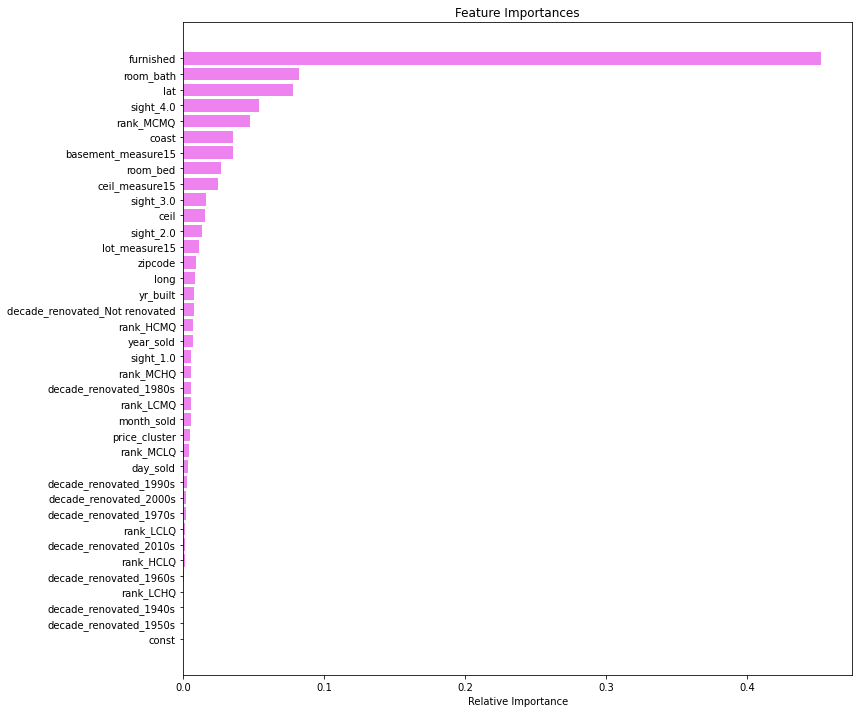

In [209]:
#Check which features the tuned random forest model (the best fit model) considered the most important for prediction
importances = xgb3.feature_importances_
indices = np.argsort(importances)
feature_names = list(X4.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**

The model considered these 5 features to be the most important for the predicition:

furnished
room_bath
lat
sight_4.0
rank_MCMQ

## Business Insights and Recommendations

**Highlights from EDA:**

- The number of houses being built slowly increases year on year as the population grows
- 95.8% of houses have not been renovated. This might present a business opportunity for projects in property development.
- 80.2 % of houses have not been furnished. This might present a business opportunity for projects in interior design.
- Houses with more bedrooms and bathrooms are typically sold at a higher price.
- Houses priced highest are typically furnished and more spacious (living_measure)
- Houses built between 1900 - 1930 and between 1995 - 2015 are priced the highest.
- Houses are priced differently depending on the zipcode. Expensive houses can be found in the zipcodes around 98000, 98040, and 98110. This illustrates the importance of selecting a good location when buying a property.
- Houses with more viewings have a higher house price. 
- Houses priced the highest were ranked "HQ" (High quality). Houses priced the lowest were ranked "LQ" (Low quality). Developing properties that reach the "HQ" should therefore be considered a priority as it has a positive impact on the house price.



**Recommendations**

- Overall, the tuned XGBoost Regression model performed better than the other models. 

- **R-squared** on the test set is 0.861 and adj. r-squared is 0.86.
- **MAE** is 0.143.
- **RMSE** is 0.195.

- Other models also performed well, but it is advised to use this model since it fit the data best.

- Based on the model, the features that affect price prediction the most are:
    * Furnished
    * Room_bath
    * Lat
    * Sight_4.0
    * Rank_MCMQ
        
- Houses which are furnished are often priced higher. Designing attractive furnished properties before promoting the property on the market is likely to impact the price of the property.
- Bathrooms play a key role in determining the price of a property. Number of bathrooms are closely tied to the living space and the quality of the property.
- Location plays a key role in determining the price of a property. Good neighbourhoods typically drive up the price for all houses in the region. Finding worn-down house in a good location could be a profitable investment long term.
- Houses which were viewed 4 times (the maximum number of times) were often priced highest. There is likely a lot of demand for these properties. Evidentially, the demand pushes up their price.
- House prices are closely linked with quality standards. Understanding why a property is ranked High quality versus Low quality could be really advantageous when trying to upscale a property.